# Unsupervised Learning: Trade&Ahead


## Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.

## Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

## Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Scale the data using z-score
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# Compute distance between each pair of the two collections of input
from scipy.spatial.distance import cdist

# Pairwise distances between observations in n-dimensional space
from scipy.spatial.distance import pdist

# Perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# Perform PCA
from sklearn.decomposition import PCA

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
# Giving Colab access to Drive
from google.colab import drive
drive.mount('/content/drive')

# Uploading the dataset
data = pd.read_csv('/content/drive/My Drive/PG Data Science and Business Analysis/Project 7: Trade&Ahead/stock_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Making a copy of the dataset to avoid changes to the original
df = data.copy()

## Data Overview

The initial steps to get an overview of the dataset is to:
- Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not.
- Get information about the number of rows and columns in the dataset.
- Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- Check the statistical summary of the dataset to get an overview of the numerical columns of the data.
- Observations
- Sanity checks

### View of a few rows of the dataset

In [4]:
# Random sample of the data
df.sample(n=10, random_state=1)

Ticker Symbol                     Security             GICS Sector  \
102           DVN           Devon Energy Corp.                  Energy   
125            FB                     Facebook  Information Technology   
11            AIV  Apartment Investment & Mgmt             Real Estate   
248            PG             Procter & Gamble        Consumer Staples   
238           OXY         Occidental Petroleum                  Energy   
336           YUM              Yum! Brands Inc  Consumer Discretionary   
112           EQT              EQT Corporation                  Energy   
147           HAL              Halliburton Co.                  Energy   
89            DFS  Discover Financial Services              Financials   
173           IVZ                 Invesco Ltd.              Financials   

                      GICS Sub Industry  Current Price  Price Change  \
102  Oil & Gas Exploration & Production      32.000000    -15.478079   
125        Internet Software & Services     104.660004     16.224320   
11                                REITs      40.029999      7.578608   
248                   Personal Products      79.410004     10.660538   
238  Oil & Gas Exploration & Production      67.610001      0.865287   
336                         Restaurants      52.516175     -8.698917   
112  Oil & Gas Exploration & Production      52.130001    -21.253771   
147      Oil & Gas Equipment & Services      34.040001     -5.101751   
89                     Consumer Finance      53.619999      3.653584   
173    Asset Management & Custody Banks      33.480000      7.067477   

     Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
102    2.923698  205          70      830000000 -14454000000   
125    1.320606    8         958      592000000   3669000000   
11     1.163334   15          47       21818000    248710000   
248    0.806056   17         129      160383000    636056000   
238    1.589520   32          64     -588000000  -7829000000   
336    1.478877  142          27      159000000   1293000000   
112    2.364883    2         201      523803000     85171000   
147    1.966062    4         189     7786000000   -671000000   
89     1.159897   20          99     2288000000   2297000000   
173    1.580839   12          67      412000000    968100000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
102              -35.55                  4.065823e+08  93.089287   1.785616  
125                1.31                  2.800763e+09  79.893133   5.884467  
11                 1.52                  1.636250e+08  26.335526  -1.269332  
248                3.28                  4.913916e+08  24.070121  -2.256747  
238              -10.23                  7.652981e+08  93.089287   3.345102  
336                2.97                  4.353535e+08  17.682214  -3.838260  
112                0.56                  1.520911e+08  93.089287   9.567952  
147               -0.79                  8.493671e+08  93.089287  17.345857  
89                 5.14                  4.468872e+08  10.431906  -0.375934  
173                2.26                  4.283628e+08  14.814159   4.218620

* The dataset has been loaded properly.
* The columns correspond with different properties for the stocks.
* There is no target column, which will call for unsupervised learning techniques.
* Each row corresponds to a different stock.
* The column 'Security' corresponds to 'Company' as described in the data dictionary. We will change that to match the dictionary.

In [5]:
# Changing column name 'Security' to 'Company'
df.rename(columns={'Security': 'Company'}, inplace=True)

In [6]:
# Fixing column names so there are no spaces
df.columns = [c.replace(" ", "_") for c in df.columns]
df.head()

Ticker_Symbol                  Company             GICS_Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS_Sub_Industry  Current_Price  Price_Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash_Ratio  Net_Cash_Flow  Net_Income  Earnings_Per_Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated_Shares_Outstanding   P/E_Ratio  P/B_Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

### Checking the shape of the data

In [7]:
df.shape

(340, 15)

* The dataset has 340 rows and 15 columns.

### Looking at the data types for each column

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker_Symbol                 340 non-null    object 
 1   Company                       340 non-null    object 
 2   GICS_Sector                   340 non-null    object 
 3   GICS_Sub_Industry             340 non-null    object 
 4   Current_Price                 340 non-null    float64
 5   Price_Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash_Ratio                    340 non-null    int64  
 9   Net_Cash_Flow                 340 non-null    int64  
 10  Net_Income                    340 non-null    int64  
 11  Earnings_Per_Share            340 non-null    float64
 12  Estimated_Shares_Outstanding  340 non-null    float64
 13  P/E_R

* Most columns are of numerical type.
* 'Ticker_Symbol', 'Company', 'GICS_Sector', and 'GICS_Sub_Industry' are object type columns.
* There seems to be no missing values in the data.

### Checking for missing and duplicated values

In [9]:
# Checking for missing values
df.isnull().sum()

Ticker_Symbol                   0
Company                         0
GICS_Sector                     0
GICS_Sub_Industry               0
Current_Price                   0
Price_Change                    0
Volatility                      0
ROE                             0
Cash_Ratio                      0
Net_Cash_Flow                   0
Net_Income                      0
Earnings_Per_Share              0
Estimated_Shares_Outstanding    0
P/E_Ratio                       0
P/B_Ratio                       0
dtype: int64

In [10]:
# Checking for duplicates
df.duplicated().sum()

0

* There are no missing values in the data.
* There are no duplicates.

### Statistical summary of all columns

In [11]:
df.describe(include='all').T

count unique  \
Ticker_Symbol                   340    340   
Company                         340    340   
GICS_Sector                     340     11   
GICS_Sub_Industry               340    104   
Current_Price                 340.0    NaN   
Price_Change                  340.0    NaN   
Volatility                    340.0    NaN   
ROE                           340.0    NaN   
Cash_Ratio                    340.0    NaN   
Net_Cash_Flow                 340.0    NaN   
Net_Income                    340.0    NaN   
Earnings_Per_Share            340.0    NaN   
Estimated_Shares_Outstanding  340.0    NaN   
P/E_Ratio                     340.0    NaN   
P/B_Ratio                     340.0    NaN   

                                                             top freq  \
Ticker_Symbol                                                AAL    1   
Company                                  American Airlines Group    1   
GICS_Sector                                          Industrials   53   
GICS_Sub_Industry             Oil & Gas Exploration & Production   16   
Current_Price                                                NaN  NaN   
Price_Change                                                 NaN  NaN   
Volatility                                                   NaN  NaN   
ROE                                                          NaN  NaN   
Cash_Ratio                                                   NaN  NaN   
Net_Cash_Flow                                                NaN  NaN   
Net_Income                                                   NaN  NaN   
Earnings_Per_Share                                           NaN  NaN   
Estimated_Shares_Outstanding                                 NaN  NaN   
P/E_Ratio                                                    NaN  NaN   
P/B_Ratio                                                    NaN  NaN   

                                           mean                std  \
Ticker_Symbol                               NaN                NaN   
Company                                     NaN                NaN   
GICS_Sector                                 NaN                NaN   
GICS_Sub_Industry                           NaN                NaN   
Current_Price                         80.862345          98.055086   
Price_Change                           4.078194          12.006338   
Volatility                             1.525976           0.591798   
ROE                                   39.597059          96.547538   
Cash_Ratio                            70.023529          90.421331   
Net_Cash_Flow                   55537620.588235  1946365312.175789   
Net_Income                    1494384602.941176  3940150279.327936   
Earnings_Per_Share                     2.776662           6.587779   
Estimated_Shares_Outstanding    577028337.75403   845849595.417695   
P/E_Ratio                             32.612563          44.348731   
P/B_Ratio                             -1.718249          13.966912   

                                        min          25%          50%  \
Ticker_Symbol                           NaN          NaN          NaN   
Company                                 NaN          NaN          NaN   
GICS_Sector                             NaN          NaN          NaN   
GICS_Sub_Industry                       NaN          NaN          NaN   
Current_Price                           4.5       38.555       59.705   
Price_Change                     -47.129693    -0.939484     4.819505   
Volatility                         0.733163     1.134878     1.385593   
ROE                                     1.0         9.75         15.0   
Cash_Ratio                              0.0         18.0         47.0   
Net_Cash_Flow                -11208000000.0 -193906500.0    2098000.0   
Net_Income                   -23528000000.0  352301250.0  707336000.0   
Earnings_Per_Share                    -61.2       1.5575        2.895   
Estimated_Shares_Outstanding    27672156.86  158848216

* Ticker_Symbol and Company have 340 unique values, which makes sense as they correspond to individual stocks. We will drop the column 'Ticker_Symbol' since it provides no additional information to our model.
* GICS_Sector has 11 unique values and GICS_Sub_Industry has 104 unique values. Shows a diverse market.
* There is a wide range of values on all numerical columns.
* Current_Price has a significant increase from 75% to max value. Suggesting a lot of stocks having a high price and being right skewed.
* Overall there seems to be big increases between 75% and max values.

In [12]:
# Dropping the column 'Ticker_Symbol'
df = df.drop(['Ticker_Symbol'], axis=1)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below to approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below is done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### Creating functions to perform EDA

In [13]:
# Function to plot boxplot and histogram

def histogram_boxplot(data, feature, figsize=(15, 10), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
# Function to create labeled barplots

def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is True)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # Percentage of each class of the category
        else:
            label = p.get_height()  # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # Annotate the percentage

    plt.show()  # Show the plot

### Univariate Analysis

#### Current stock price

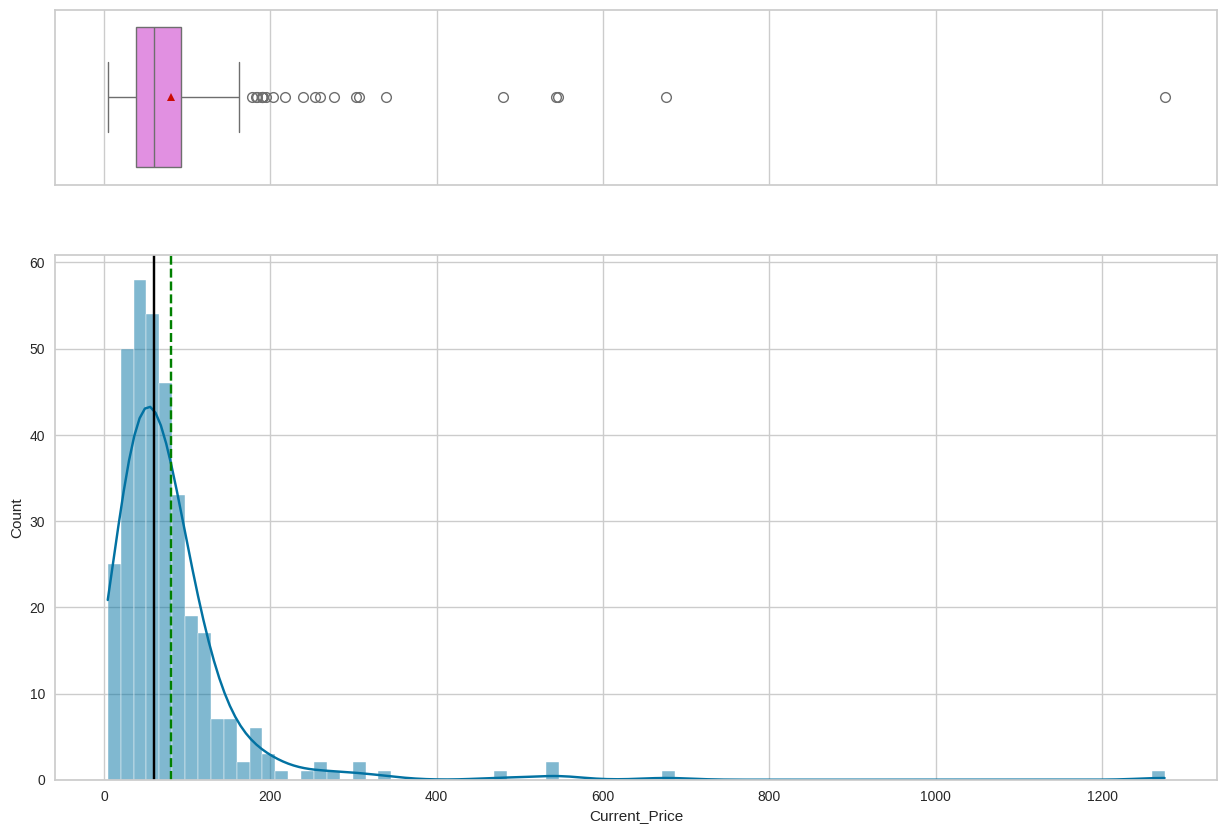

In [15]:
# Visual for Current_Price
histogram_boxplot(df, 'Current_Price')

* Distribution of current price is very right skewed.
* Most of the prices are on the lower end and below $100.

#### Percentage price change in 13 weeks

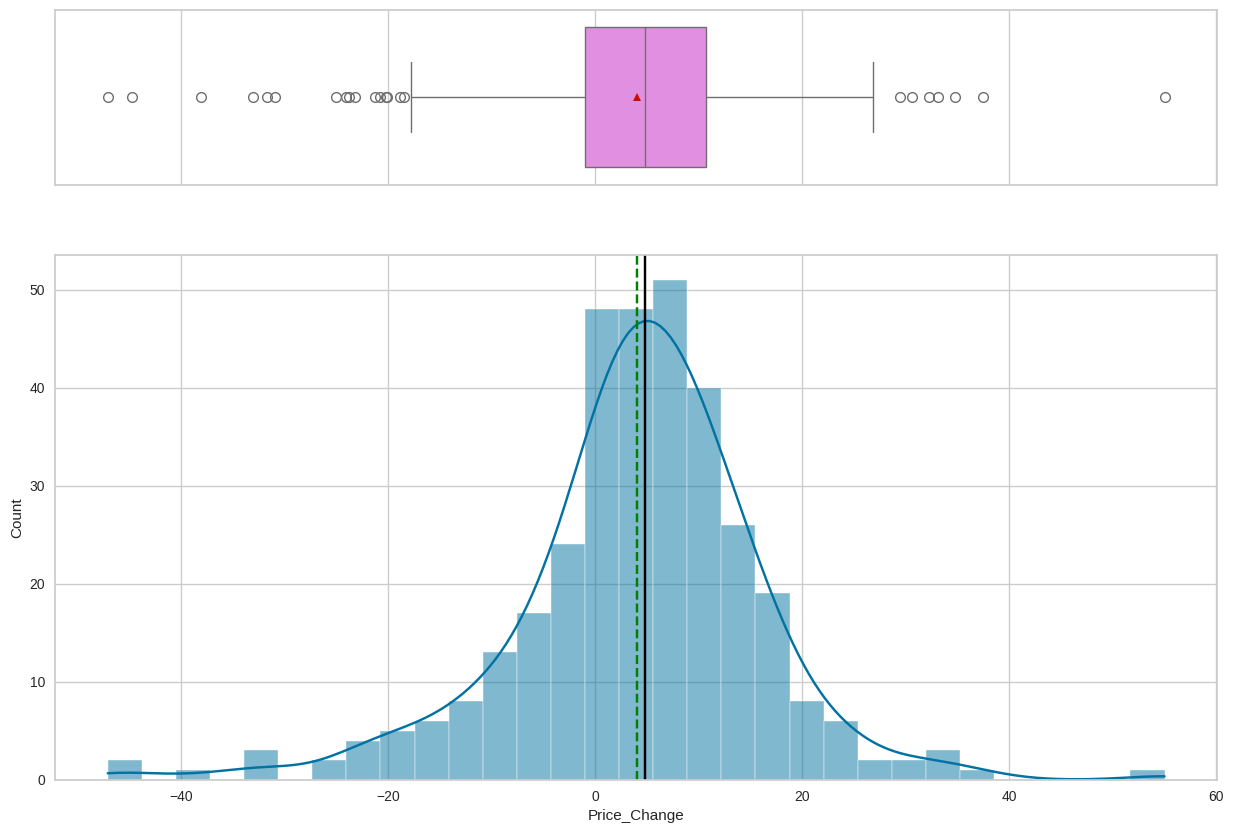

In [16]:
# Visual on Price_Change
histogram_boxplot(df, 'Price_Change')

* Mean and median are above 0, indicating an overall increase of stock prices.
* There are more outliers on the lower end than the right end. However, there has been many variations in price in the past 13 weeks.

#### Volatility: standard deviation of the stock price in 13 weeks.

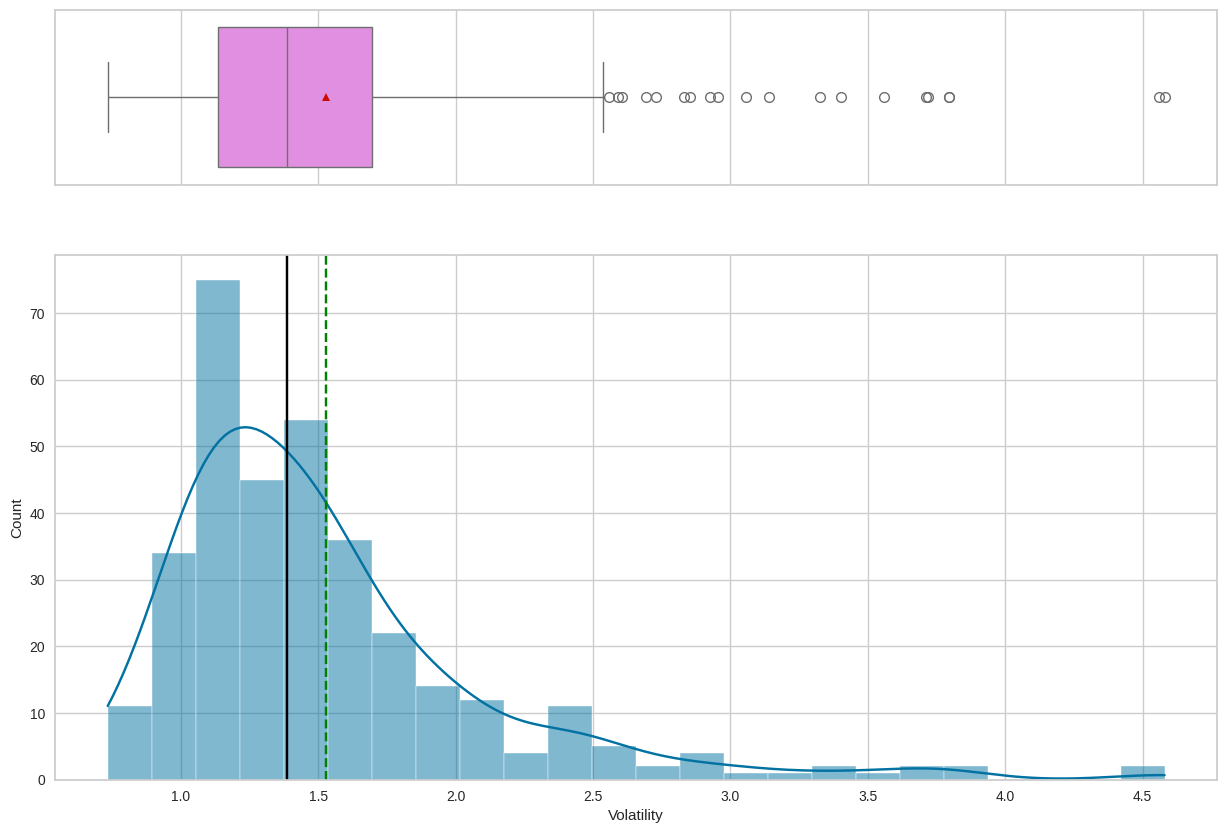

In [17]:
# Visual for Volatility
histogram_boxplot(df, 'Volatility')

* Distribution is right skewed.
* Most stocks have lower volatility, these stocks have less risk as they have less fluctuations in price.

#### ROE: net income divided by shareholders' equity

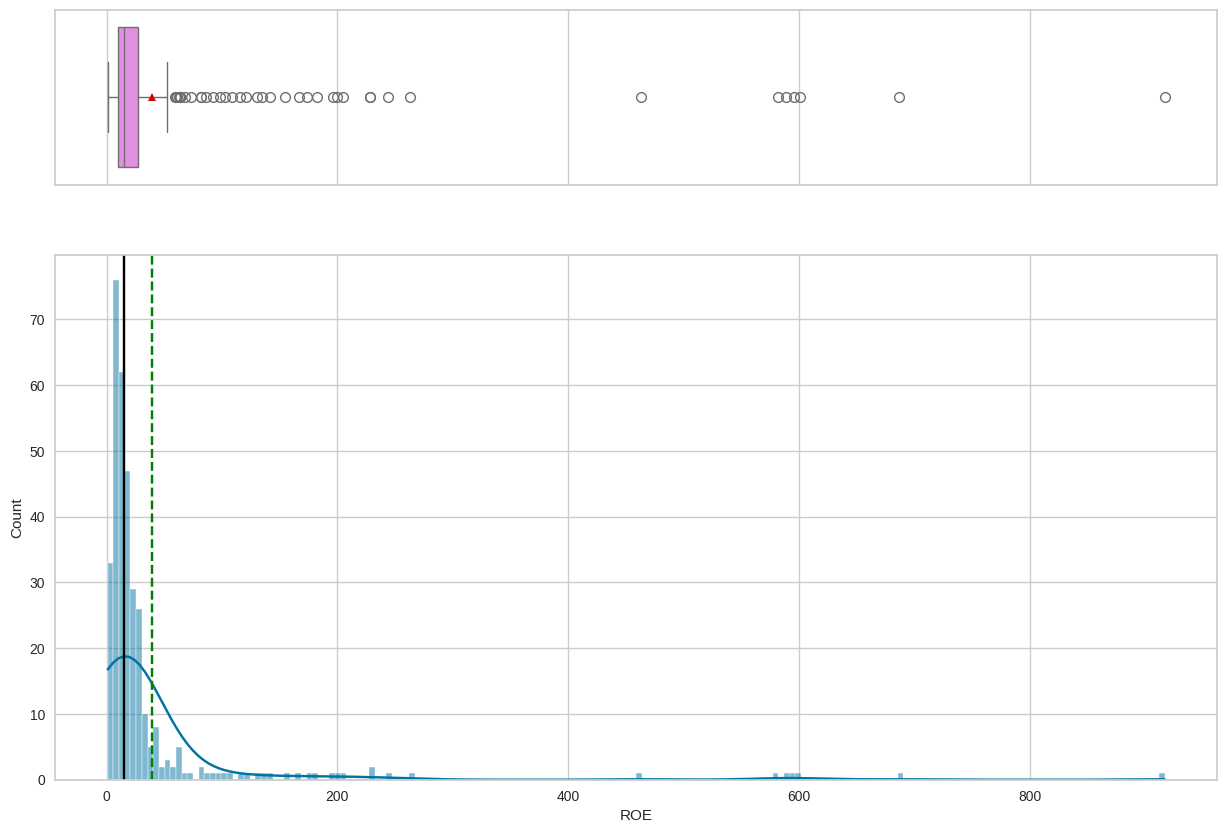

In [18]:
# Visual for ROE
histogram_boxplot(df, 'ROE')

* Majority of the stocks have lower volatility.
* Very few have a volatility higher than 200.
* Higher ROE shows the company's ability at converting its equity into profits. However, we would need to consider the company's income and debt amounts to consider ROE a good reference.

#### Cash Ratio

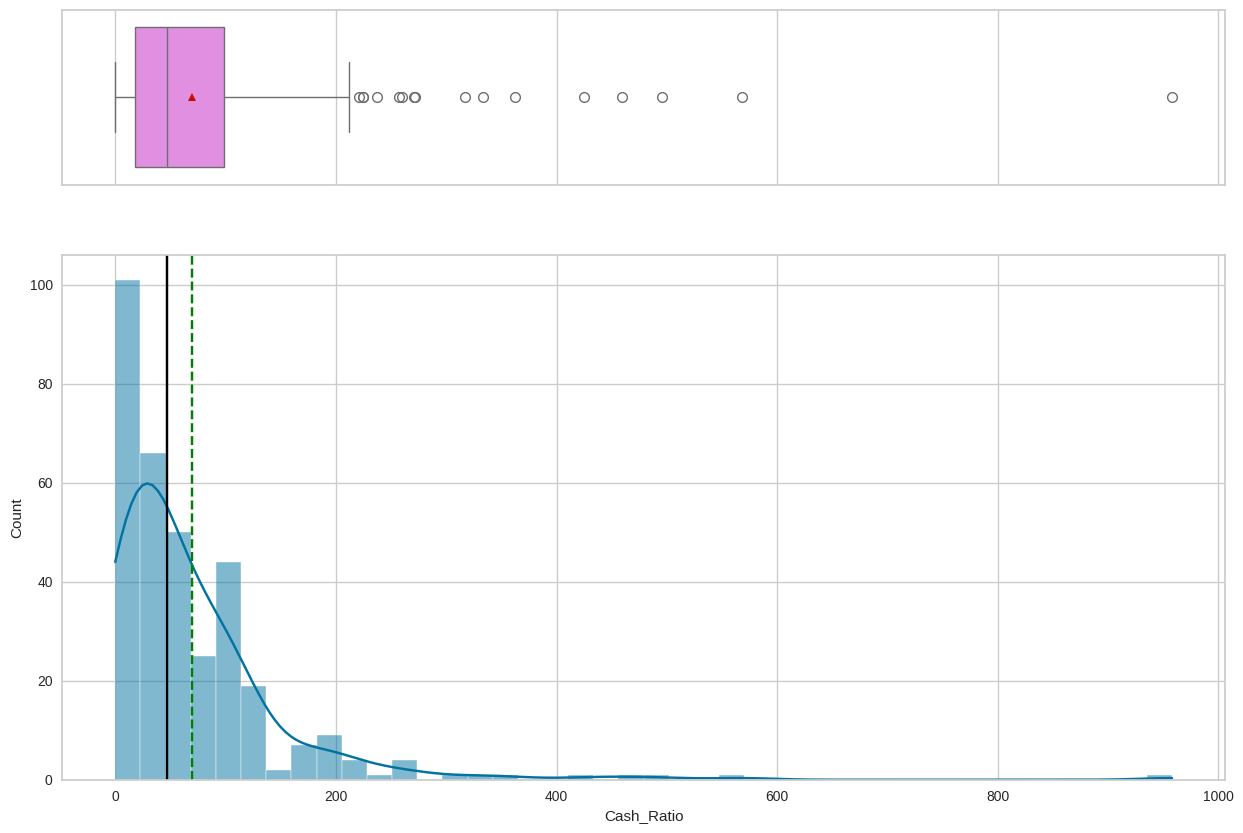

In [19]:
# Visual for cash ratio
histogram_boxplot(df, 'Cash_Ratio')

* Distribution is heavily right skewed with many outliers above 200.
* Having a lot of low values shows that the company might default on debt payments.
* There are no negative values, meaning that all companies should have enough cash and cash equivalents to cover liabilities.
* Seems like many companies have cash ratios close to 0, showing risky investments.

#### Net cash flow: difference between inflows and outflows

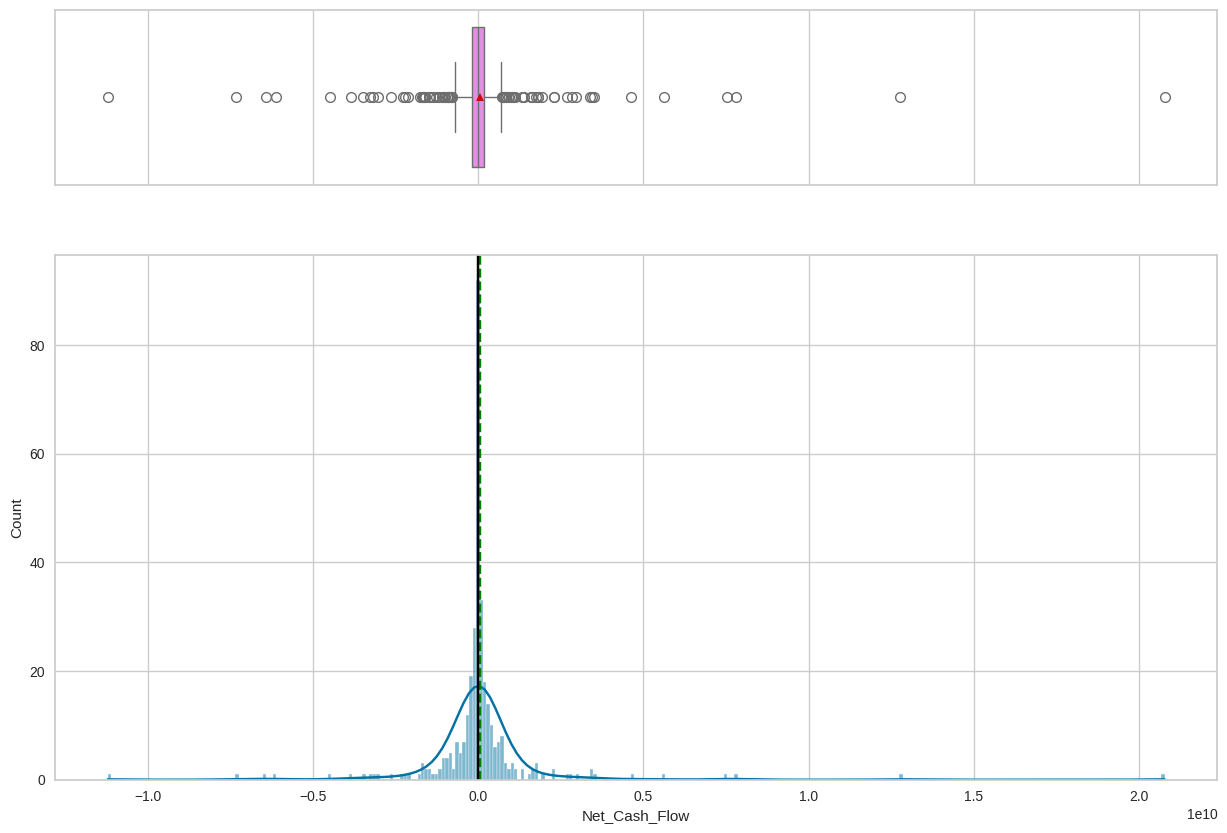

In [20]:
# Visual for net cash flow
histogram_boxplot(df, 'Net_Cash_Flow')

* There are many outliers in the data and a big variance.
* Most companies are able to balance cash flow.
* A higher net cash flow demonstrates good revenue.

#### Net income in dollars

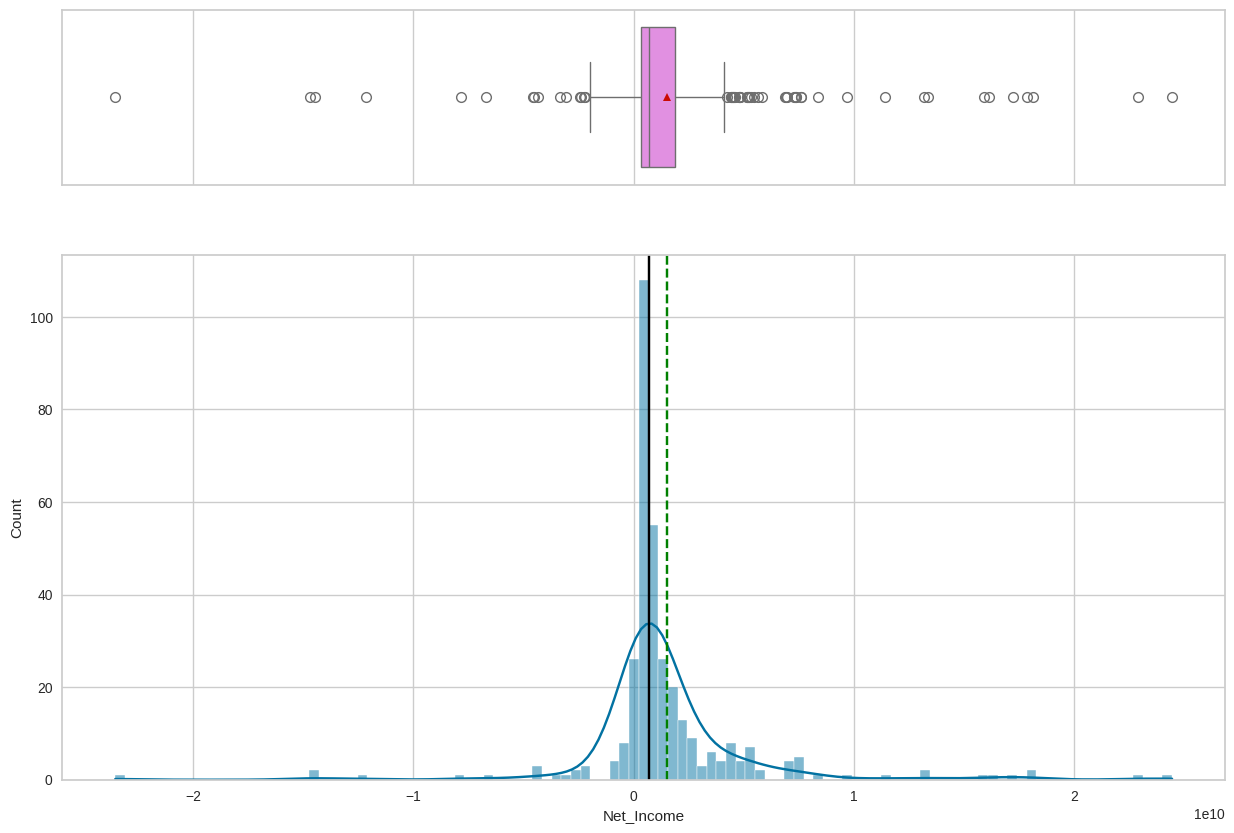

In [21]:
# Visual for net income
histogram_boxplot(df, 'Net_Income')

* A few companies have a negative net income with significant losses.
* There are some outliers on the right end, showing that these companies have a high net income and profits.
* Majority of the stocks are slightly above 0 showing a positive net income, but could be considered moderate.

#### Earnings per share

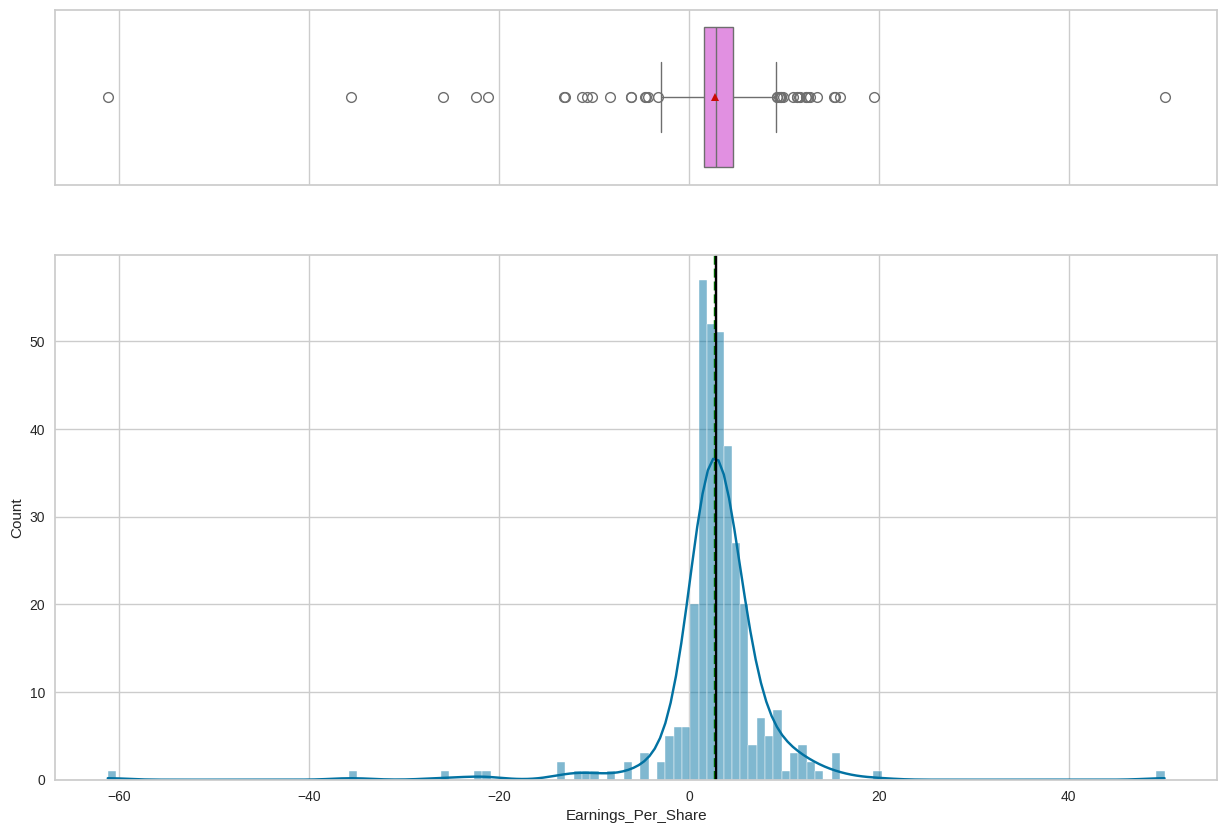

In [22]:
# Visual for earnings per share
histogram_boxplot(df, 'Earnings_Per_Share')

* The distribution is similar to net income with left skewed data. This makes sense as earnings in stocks are related to the income of a company.

#### Estimated shares outstanding

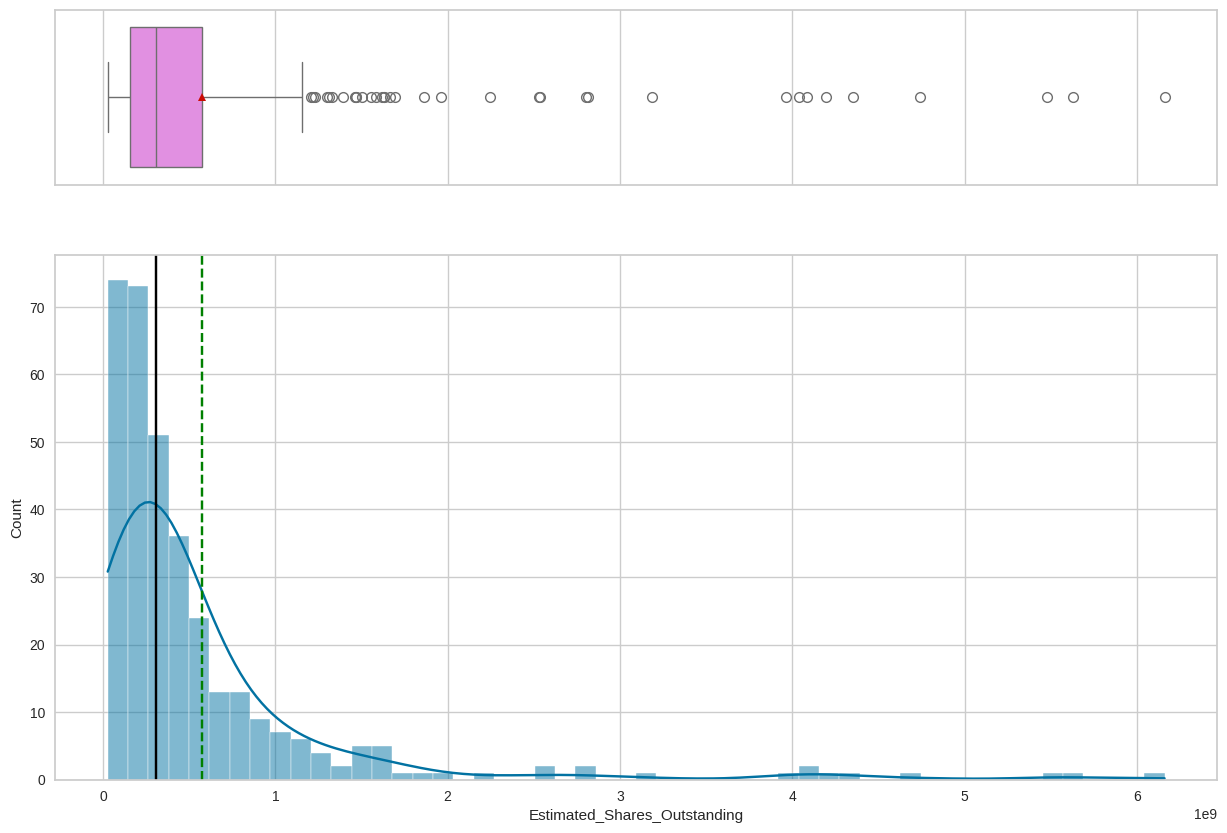

In [23]:
# Visual for estimated shares outstanding
histogram_boxplot(df, 'Estimated_Shares_Outstanding')

* Distribution is very right skewed with many outliers on the upper side.
* The mean is right at the end of the second quartile.
* 50% of the company's stock is held by its shareholders. Fewer outstanding shares available for trading could lead to higher stock prices as the demand will increase.

#### Ratio of the company's current stock price to the earnings per share (P/E ratio)

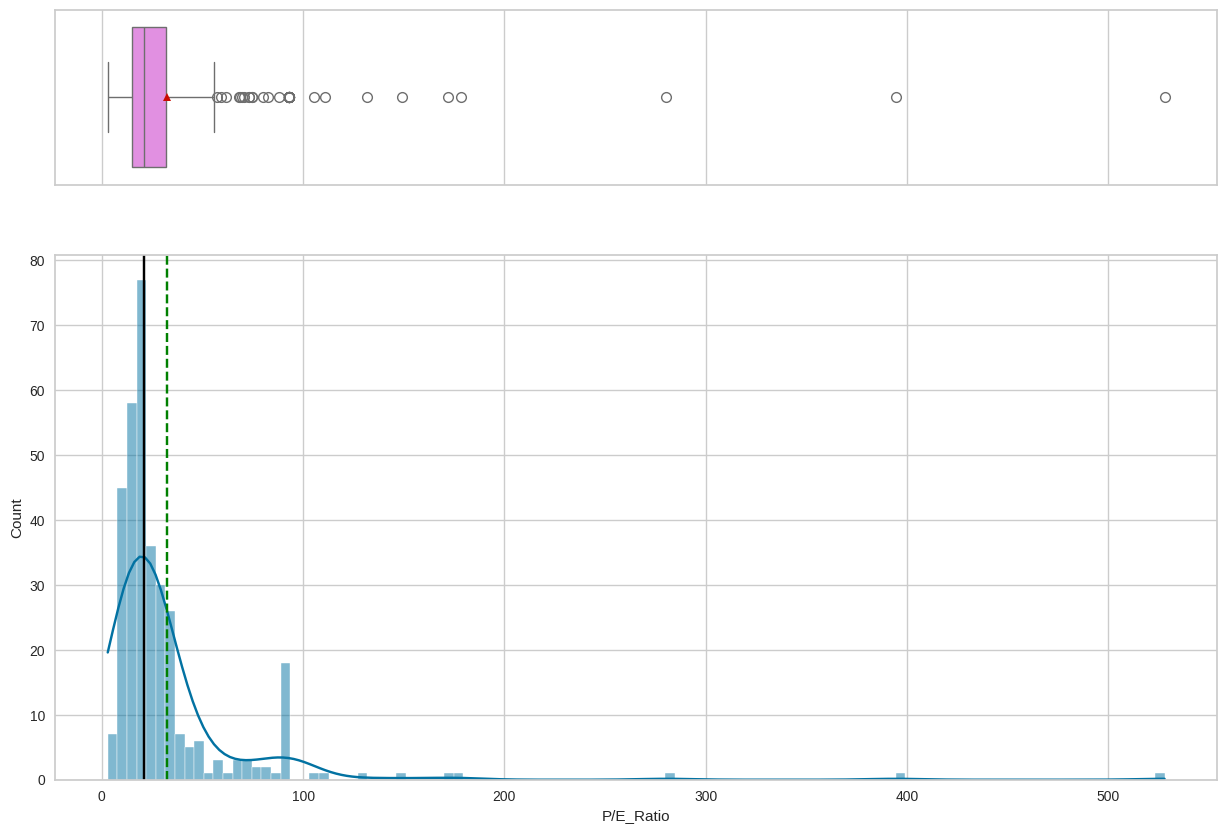

In [24]:
# Visual for P/E ratio
histogram_boxplot(df, 'P/E_Ratio')

* All the values are above 0, which is suprising since many companies have a negative net income.
* Most stocks have a lower ratio, indicating a good investment as the price is low compared to its earnings.

#### Ratio of the company's stock price per share by its book value (P/B Ratio)

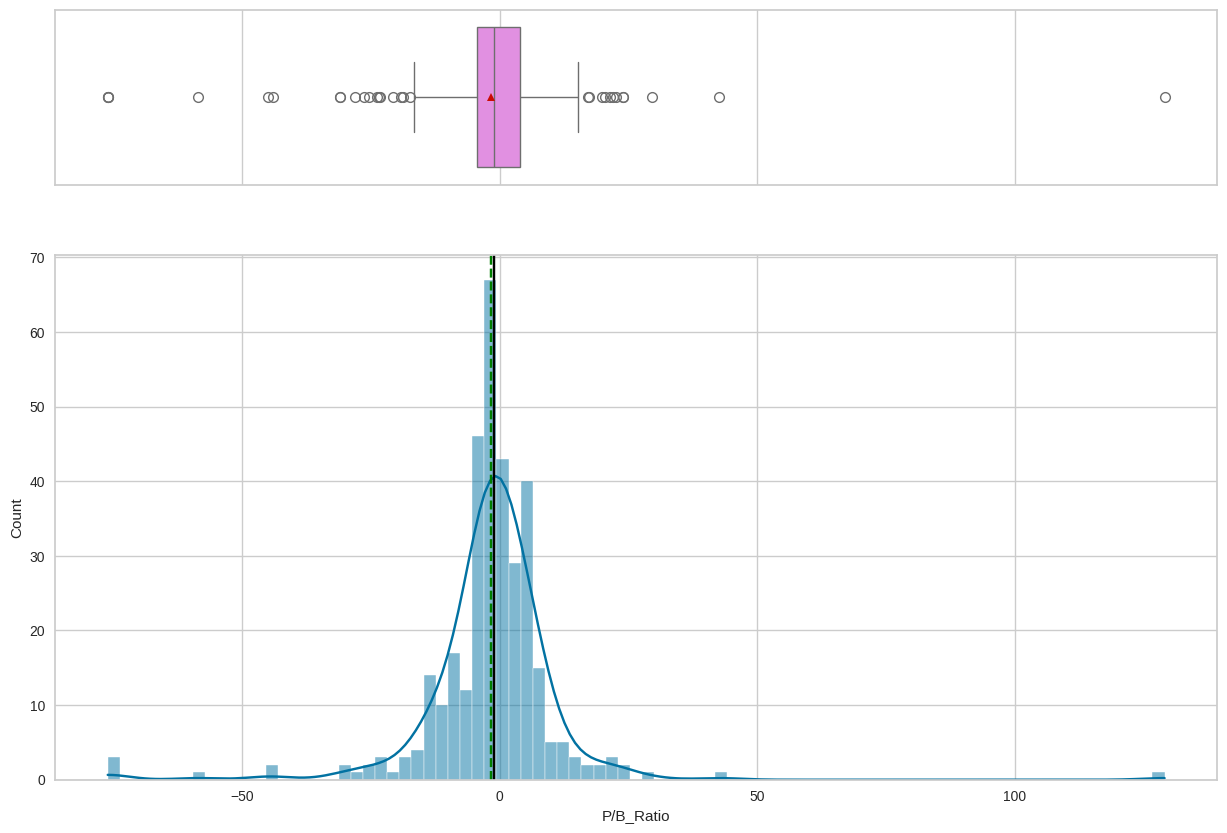

In [25]:
# Visual for P/B Ratio
histogram_boxplot(df, 'P/B_Ratio')

* There are outliers on both ends.
* Mean and median are similar and they are both close to 0.
* Lower P/B ratios are good indicators for investment as the stock price is likely to increase. We observed that the overall prices increased over the past 13 weeks.

#### Economic sectors of the companies

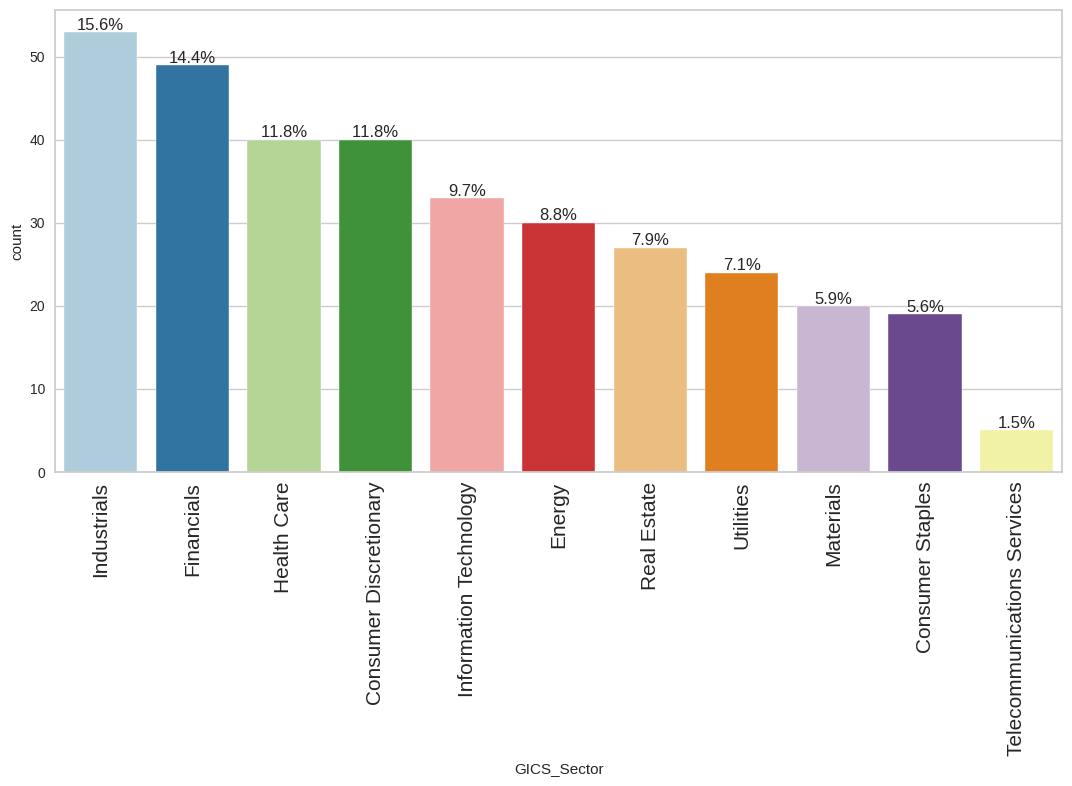

In [26]:
# Visual on GICS_Sector
labeled_barplot(df, 'GICS_Sector')

* Industrials and Financials are the main sectors for investment with 15.6% and 14.4% of stocks respectively.
* Health care and Consumer discretionary both have 13.8% of stocks.

#### Sub industry groups

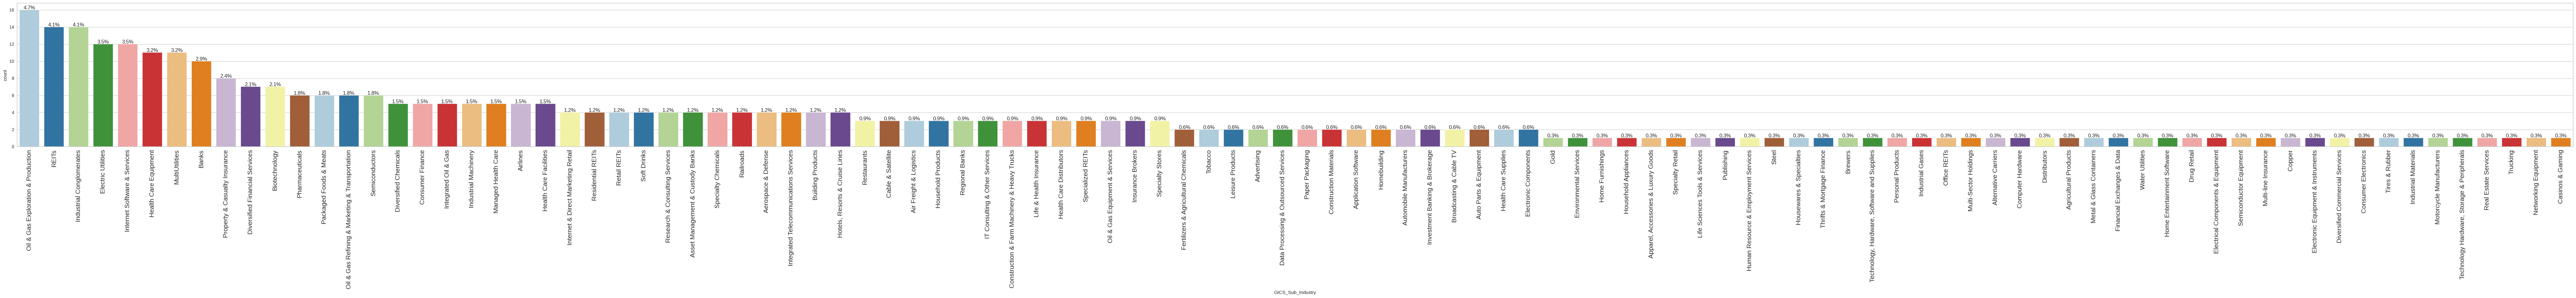

In [27]:
# Visual on GICS_Sub_Industry
labeled_barplot(df, 'GICS_Sub_Industry')

In [28]:
# Checking the counts of sub industry sectors
df.GICS_Sub_Industry.value_counts()

GICS_Sub_Industry
Oil & Gas Exploration & Production                 16
REITs                                              14
Industrial Conglomerates                           14
Electric Utilities                                 12
Internet Software & Services                       12
Health Care Equipment                              11
MultiUtilities                                     11
Banks                                              10
Property & Casualty Insurance                       8
Diversified Financial Services                      7
Biotechnology                                       7
Pharmaceuticals                                     6
Packaged Foods & Meats                              6
Oil & Gas Refining & Marketing & Transportation     6
Semiconductors                                      6
Diversified Chemicals                               5
Consumer Finance                                    5
Integrated Oil & Gas                                5
Industrial Machinery                                5
Managed Health Care                                 5
Airlines                                            5
Health Care Facilities                              5
Internet & Direct Marketing Retail                  4
Residential REITs                                   4
Retail REITs                                        4
Soft Drinks                                         4
Research & Consulting Services                      4
Asset Management & Custody Banks                    4
Specialty Chemicals                                 4
Railroads                                           4
Aerospace & Defense                                 4
Integrated Telecommunications Services              4
Building Products                                   4
Hotels, Resorts & Cruise Lines                      4
Restaurants                                         3
Cable & Satellite                                   3
Air Freight & Logistics                             3
Household Products                                  3
Regional Banks                                      3
IT Consulting & Other Services                      3
Construction & Farm Machinery & Heavy Trucks        3
Life & Health Insurance                             3
Health Care Distributors                            3
Specialized REITs                                   3
Oil & Gas Equipment & Services                      3
Insurance Brokers                                   3
Specialty Stores                                    3
Fertilizers & Agricultural Chemicals                2
Tobacco                                             2
Leisure Products                                    2
Advertising                                         2
Data Processing & Outsourced Services               2
Paper Packaging                                     2
Construction Materials                              2
Application Software                                2
Homebuilding                                        2
Automobile Manufacturers                            2
Investment Banking & Brokerage                      2
Broadcasting & Cable TV                             2
Auto Parts & Equipment                              2
Health Care Supplies                                2
Electronic Components                               2
Gold                                                1
Environmental Services                              1
Home Furnishings                                    1
Household Appliances                                1
Apparel, Accessories & Luxury Goods                 1
Specialty Retail                                    1
Life Sciences Tools & Services                      1
Publishing                                          1
Human Resource & Employment Services                1
Steel                                               1
Housewares & Specialties                            1
Thrifts & Mortgage Finance              

* Oil & Gas Exploration & Production, REITs, Industrial Conglomerates, Electric Utilities, Internet Software & Services, Health Care Equipment, MultiUtilities, and Banks have 10 or more investments.

### Bivariate Analysis

#### Correlation check
* How are the different variables correlated with each other?

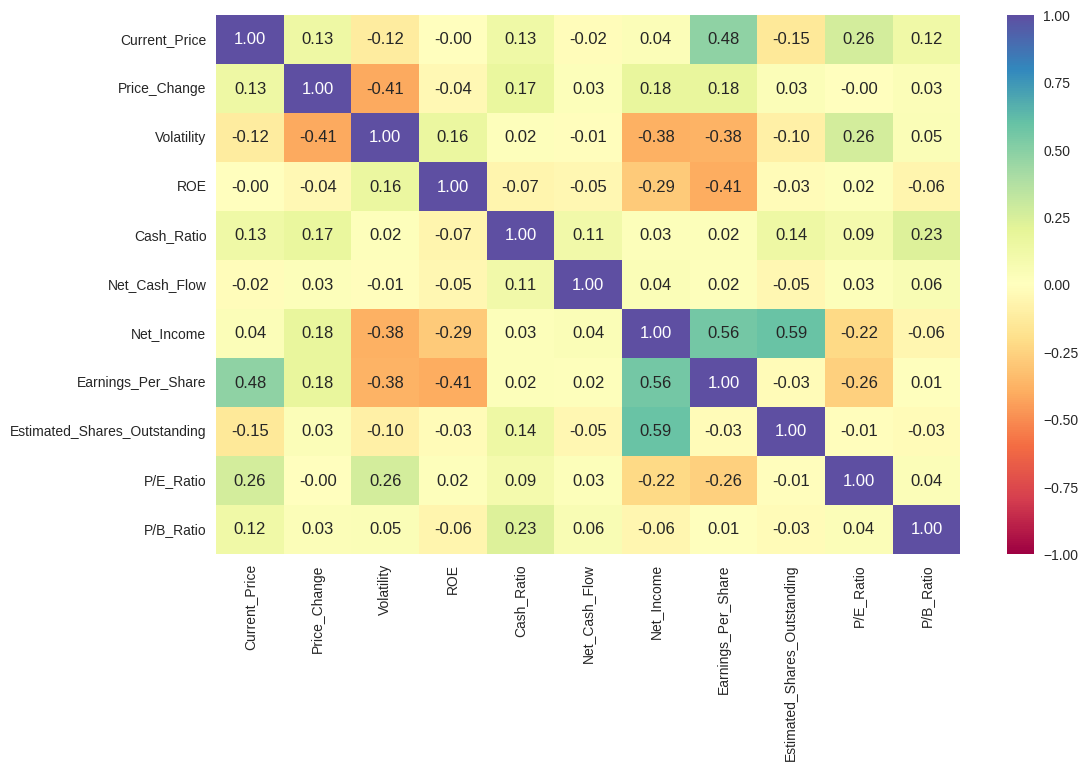

In [29]:
# Creating a new variable with numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

# Visualizing a correlation map
plt.figure(figsize=(12, 7))
sns.heatmap(df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral");

* There are no highly correlated variables. However, there are some variables moderately correlated (between +/- 0.4 and 0.59).
* Estimated shares outstanding and Net income have the highest positive correlation at 0.59.
* Earnings per share is also positively correlated to income at 0.56.
* Earnings per share and Current price have a positive correlation of 0.48. This positive correlation make sense since it shows that as the price increases, earnings and demand are likely to increase.
* Volatility and Price change are negatively correlated. It could show that the higher the volatility, less change in price.
* There is also a negative correlation between Earnings per share and ROE. As most companies have lower ROE, it makes sense that as there is more equity for shareholders, the earnings will decrease.

#### Pairplot: visualizing all variables together

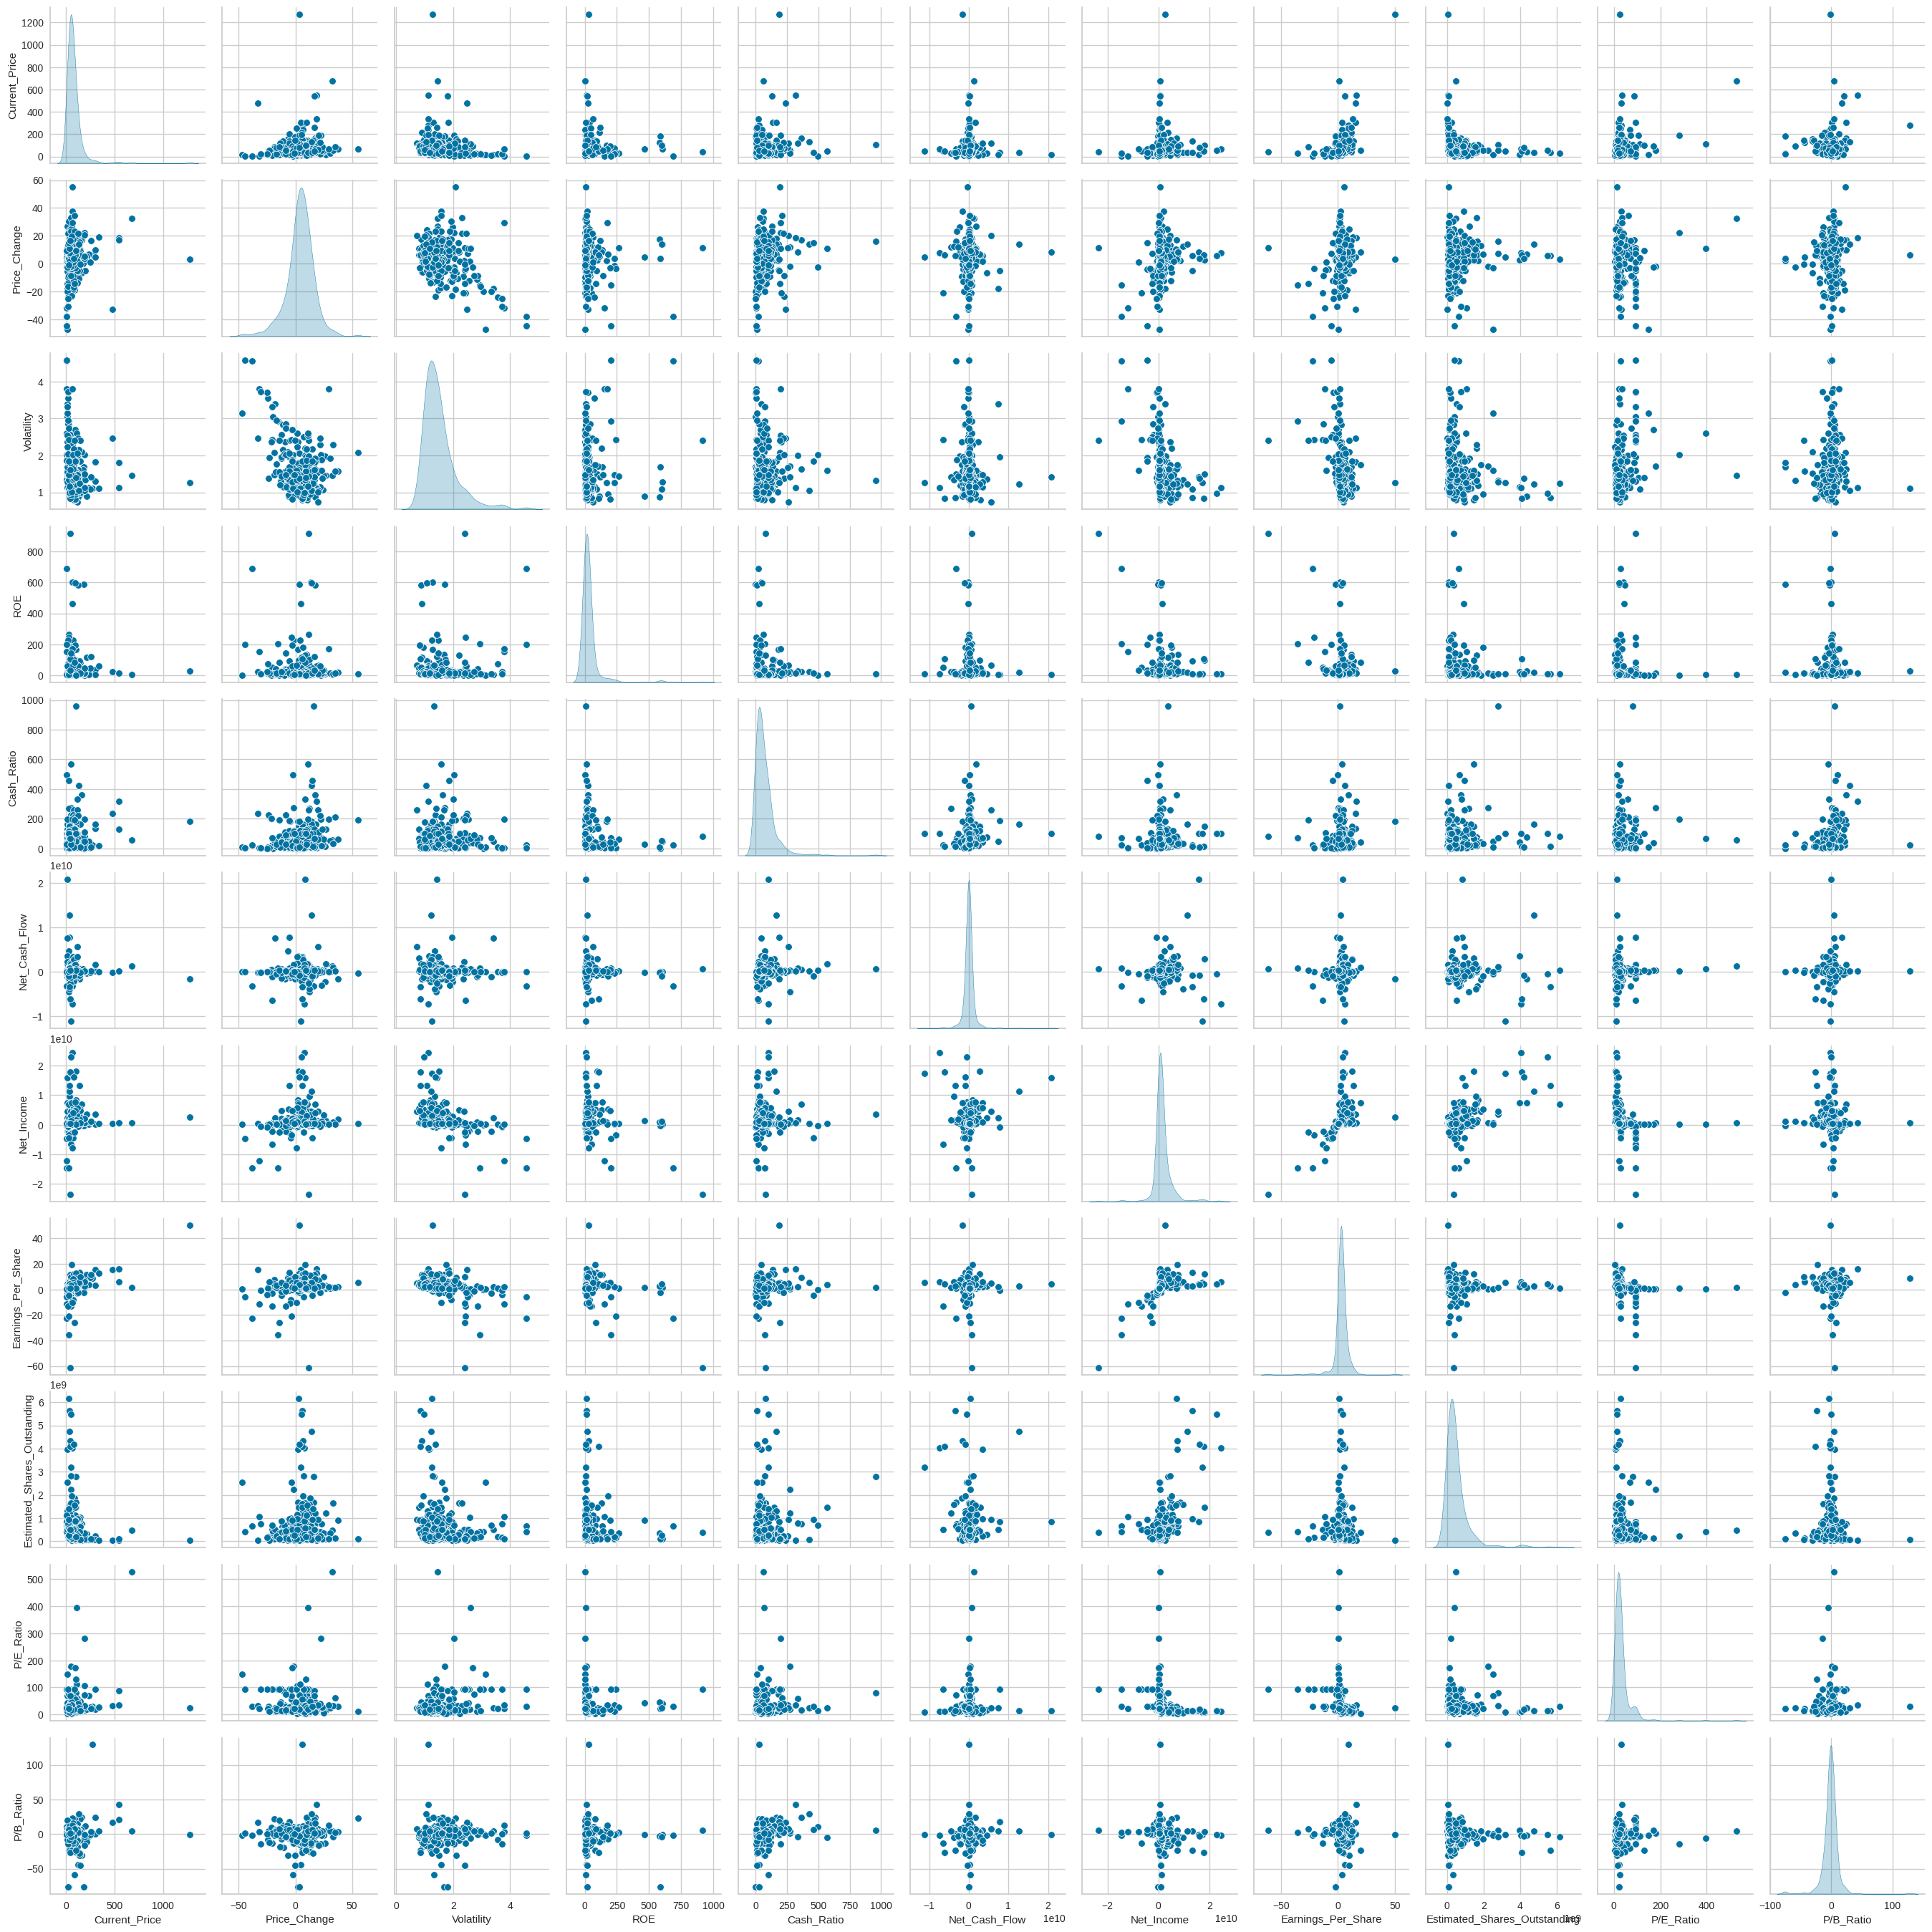

In [30]:
# Printing the visuals
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

* Current price, Volatility, ROE, Cash ratio, Estimated shares outstanding, and P/E ratio are all right skewed variables.
* All other variables seem almost of symmetrical distribution.

#### Price Change and GICS Sector
* The stocks of which economic sector have seen the maximum price increase on average?
* We will create a new variable that groups by economic sector (GICS_Sector) and calculate the average price change before visualizing the data.

In [31]:
# Looking at the average price change by sectors
df.groupby('GICS_Sector')['Price_Change'].mean().sort_values(ascending=False)

GICS_Sector
Health Care                     9.585652
Consumer Staples                8.684750
Information Technology          7.217476
Telecommunications Services     6.956980
Real Estate                     6.205548
Consumer Discretionary          5.846093
Materials                       5.589738
Financials                      3.865406
Industrials                     2.833127
Utilities                       0.803657
Energy                        -10.228289
Name: Price_Change, dtype: float64

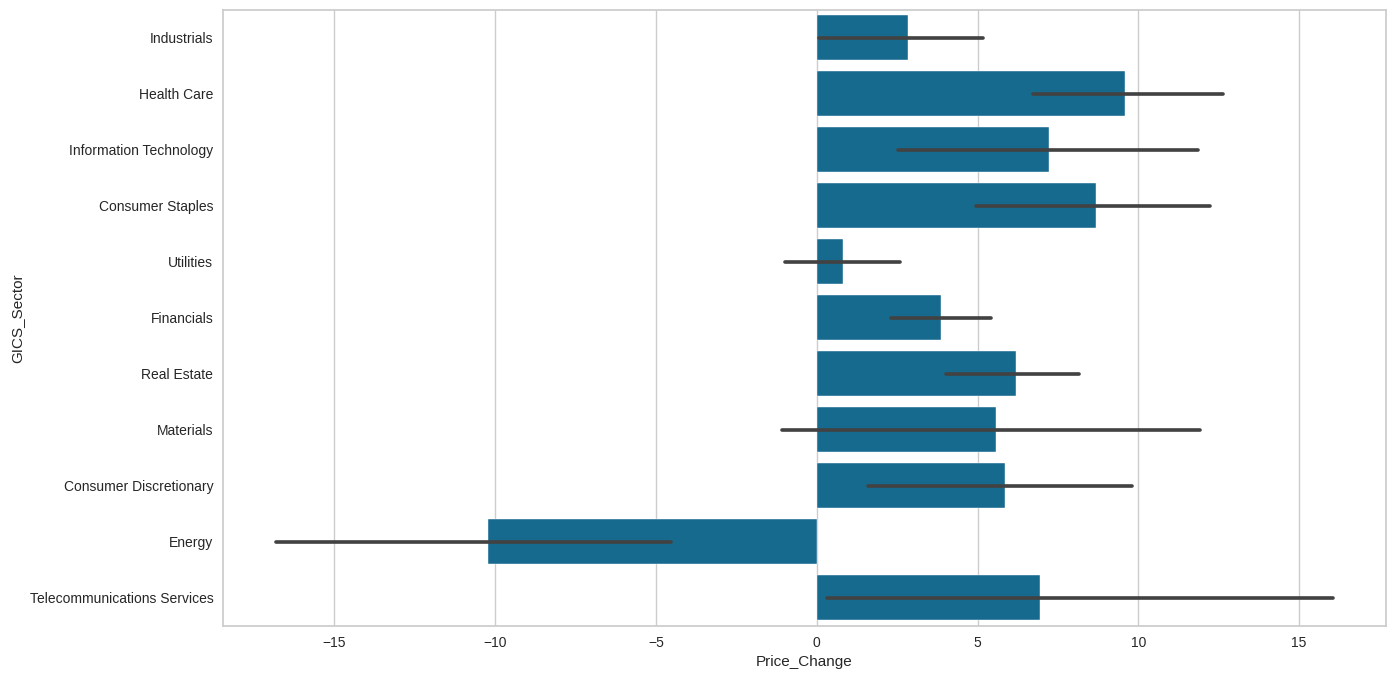

In [32]:
# Visual representation of the table above
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='Price_Change', y='GICS_Sector');

* On average, Health Care has the highest percentage price change in 13 weeks.
* Consumer Staples and Information Technology have and average of more than a 7% price increase.
* Some Utilities and Materials stocks show a negative price change. The overall price change is positive in these two economic sectors.
* On the other hand, Energy has a significant drop on its percentage price change at ~10%. The price of all energy stocks are below 0.

#### Cash Ratio and GICS Sector
* Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
* We will follow a similar approach as in the previous analysis.

In [33]:
# Looking at the cash ratios per sector
df.groupby('GICS_Sector')['Cash_Ratio'].mean().sort_values(ascending=False)

GICS_Sector
Information Technology         149.818182
Telecommunications Services    117.000000
Health Care                    103.775000
Financials                      98.591837
Consumer Staples                70.947368
Energy                          51.133333
Real Estate                     50.111111
Consumer Discretionary          49.575000
Materials                       41.700000
Industrials                     36.188679
Utilities                       13.625000
Name: Cash_Ratio, dtype: float64

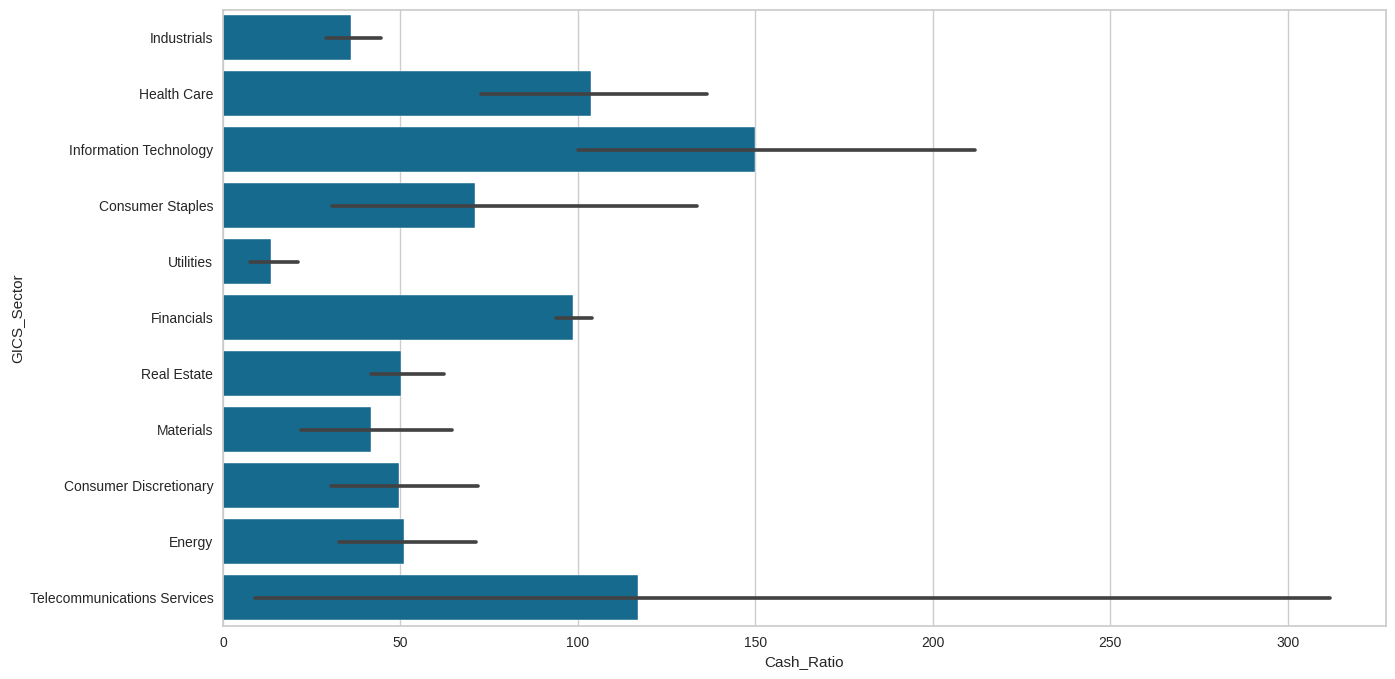

In [34]:
# Visual representation of the table above
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='Cash_Ratio', y='GICS_Sector');

* Information Technology and Telecommunications Services have high cash ratios, showing their ability to cover short-term obligations.
* Telecommunications Services has a wide Cash Ratio variance.
* Utilities have a low cash ratio, but assuming the data is in percentages, we can say that on average they are able to pay their debts.
* Companies with high cash ratios also have higher price changes.

#### P/E Ratio and GICS Sector
* P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?
* A similar approach is done as in the previous analysis.

In [35]:
# Looking at the p/e ratios per sector
df.groupby('GICS_Sector')['P/E_Ratio'].mean().sort_values(ascending=False)

GICS_Sector
Energy                         72.897709
Information Technology         43.782546
Real Estate                    43.065585
Health Care                    41.135272
Consumer Discretionary         35.211613
Consumer Staples               25.521195
Materials                      24.585352
Utilities                      18.719412
Industrials                    18.259380
Financials                     16.023151
Telecommunications Services    12.222578
Name: P/E_Ratio, dtype: float64

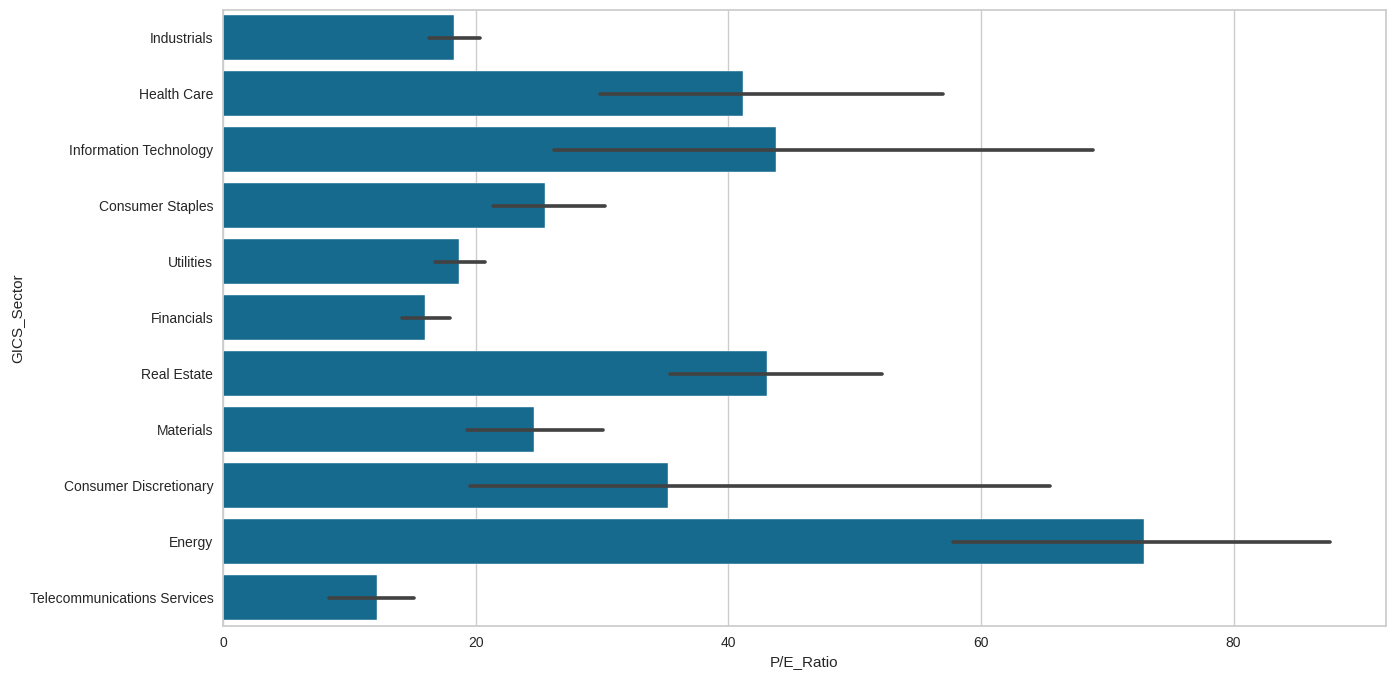

In [36]:
# Visual representation of the table above
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='P/E_Ratio', y='GICS_Sector');

* Energy has a significantly higher P/E Ratio compared to the rest of industries.
* High P/E Ratios like Energy could mean that the stock is overvalued or possible high growth rates. We would need to analyze the history of the P/E ratios to determine why Energy has such a high ratio.
* Knowing that the price has decreased over the last 13 weeks for Energy, we can assume that the stock was overvalued.
* Most sectors with a P/E ratio below 25 had a slight increase in price and good cash ratios, these industries could be good investments as the price may rise in the future.

#### Volatility and GICS Sector
* Volatility is the rate at which the price of the stock varies. We saw a right skewed distribution of volatility, let's check which stocks have lower volatility per economic sector

In [37]:
# Looking at the volatility per sector
df.groupby('GICS_Sector')['Volatility'].mean().sort_values(ascending=False)

GICS_Sector
Energy                         2.568777
Materials                      1.816726
Information Technology         1.659801
Consumer Discretionary         1.595478
Health Care                    1.541023
Industrials                    1.416989
Telecommunications Services    1.341612
Financials                     1.267255
Real Estate                    1.206053
Consumer Staples               1.152675
Utilities                      1.118018
Name: Volatility, dtype: float64

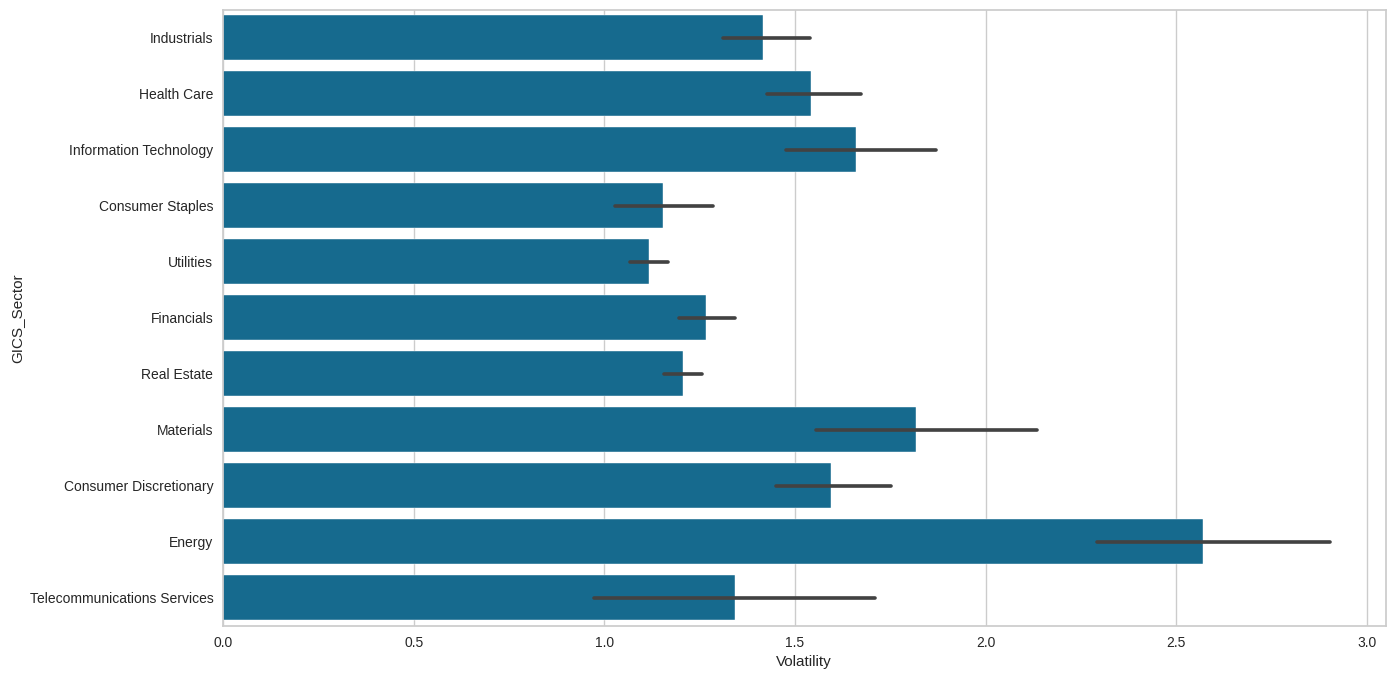

In [38]:
# Visual representation of the table above
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='Volatility', y='GICS_Sector');

* Energy had a negative price change on all stocks and has the highest volatility at ~2.57.
* Utilities has the lowest volatility value.

#### Estimated Shares Outstanding and GICS Sector
* Let's check the average amount of outstanding shares per economic sector

In [39]:
# Looking at outstanding shares per sector
df.groupby('GICS_Sector')['Estimated_Shares_Outstanding'].mean().sort_values(ascending=False)

GICS_Sector
Telecommunications Services    2.259575e+09
Consumer Staples               9.136852e+08
Information Technology         8.282789e+08
Health Care                    6.845955e+08
Financials                     6.838773e+08
Energy                         6.635288e+08
Consumer Discretionary         3.996513e+08
Utilities                      3.809193e+08
Industrials                    3.547169e+08
Real Estate                    3.444540e+08
Materials                      3.085246e+08
Name: Estimated_Shares_Outstanding, dtype: float64

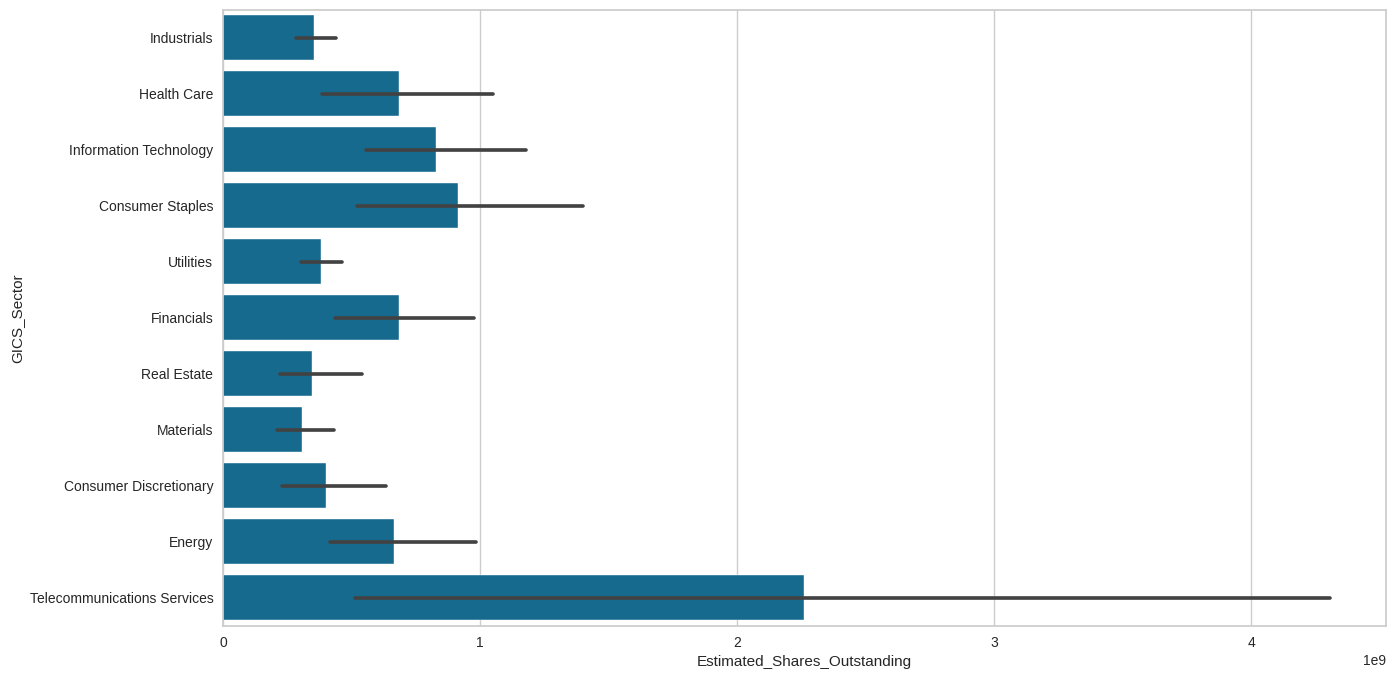

In [40]:
# Visual representation of the table above
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='Estimated_Shares_Outstanding', y='GICS_Sector');

* Telecommunications Services have the highest amount of stocks held by its shareholders, but also has the lowest P/E Ratio and high cash ratio. This could be a good investment.

## Data Preprocessing

- Outlier check
- Scaling

### Outlier Check

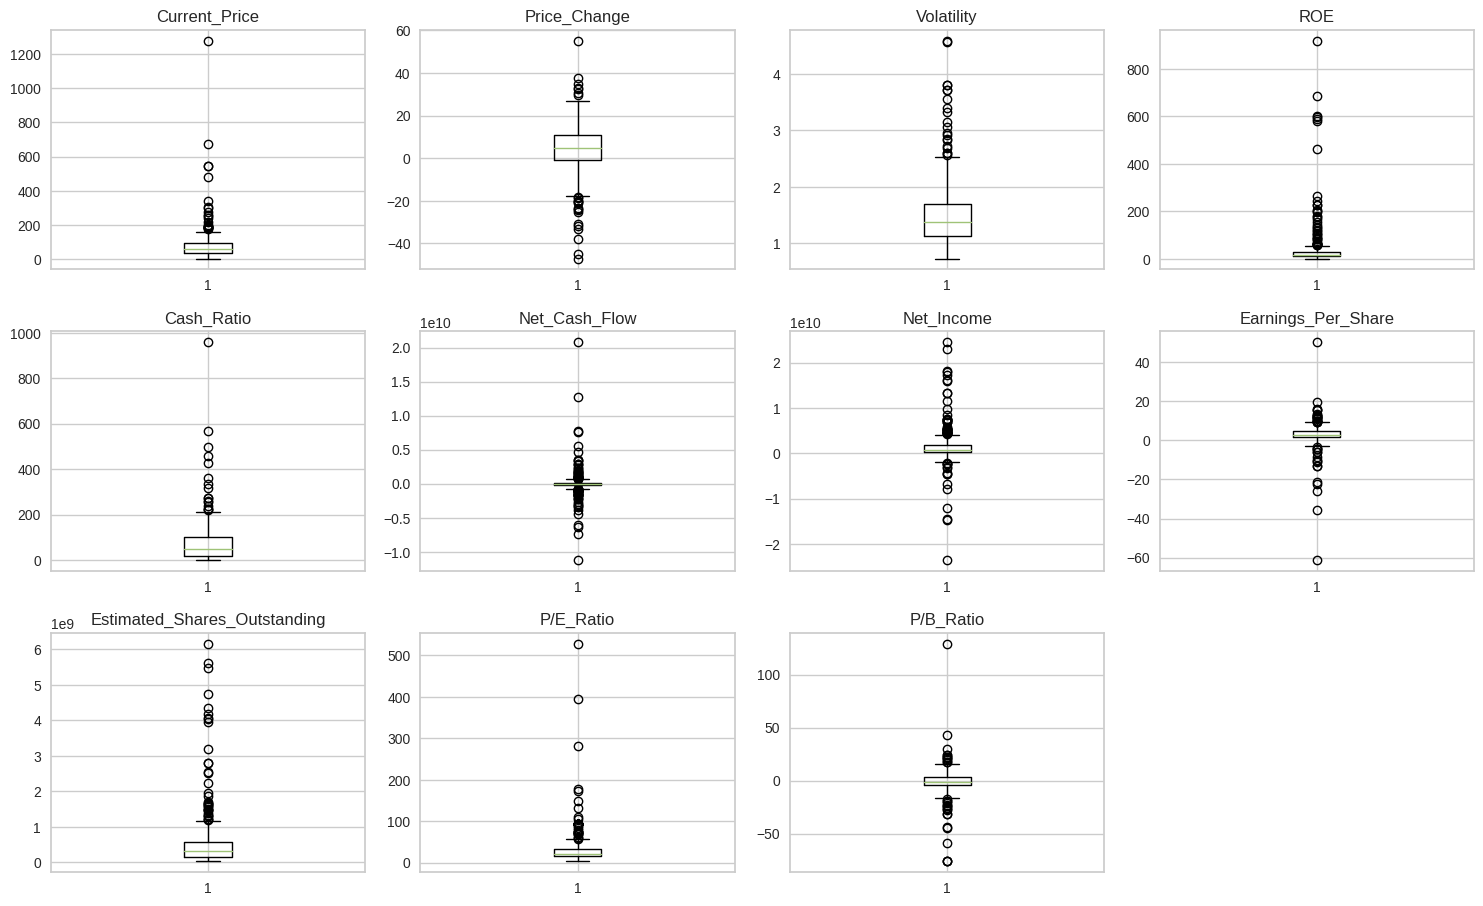

In [41]:
# Outlier detection using boxplots
plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_col):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* All variables have outliers. 5 variables have outliers on both ends.
* We will not treat them and consider them proper values.

### Scaling

In [42]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [43]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [44]:
# Looking at the first first rows of scaled data
subset_scaled_df.head()

Current_Price  Price_Change  Volatility       ROE  Cash_Ratio  \
0      -0.393341      0.493950    0.272749  0.989601   -0.210698   
1      -0.220837      0.355439    1.137045  0.937737    0.077269   
2      -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3       0.133567      0.825696   -0.284802 -0.317379    1.218059   
4      -0.260874     -0.492636    0.296470 -0.265515    2.237018   

   Net_Cash_Flow  Net_Income  Earnings_Per_Share  \
0      -0.339355    1.554415            1.309399   
1      -0.002335    0.927628            0.056755   
2       0.454058    0.744371            0.024831   
3      -0.152497   -0.219816           -0.230563   
4       0.133564   -0.202703           -0.374982   

   Estimated_Shares_Outstanding  P/E_Ratio  P/B_Ratio  
0                      0.107863  -0.652487  -0.506653  
1                      1.250274  -0.311769  -0.504205  
2                      1.098021  -0.391502   0.094941  
3                     -0.091622   0.947148   0.424333  
4                      1.978399   3.293307   0.199196

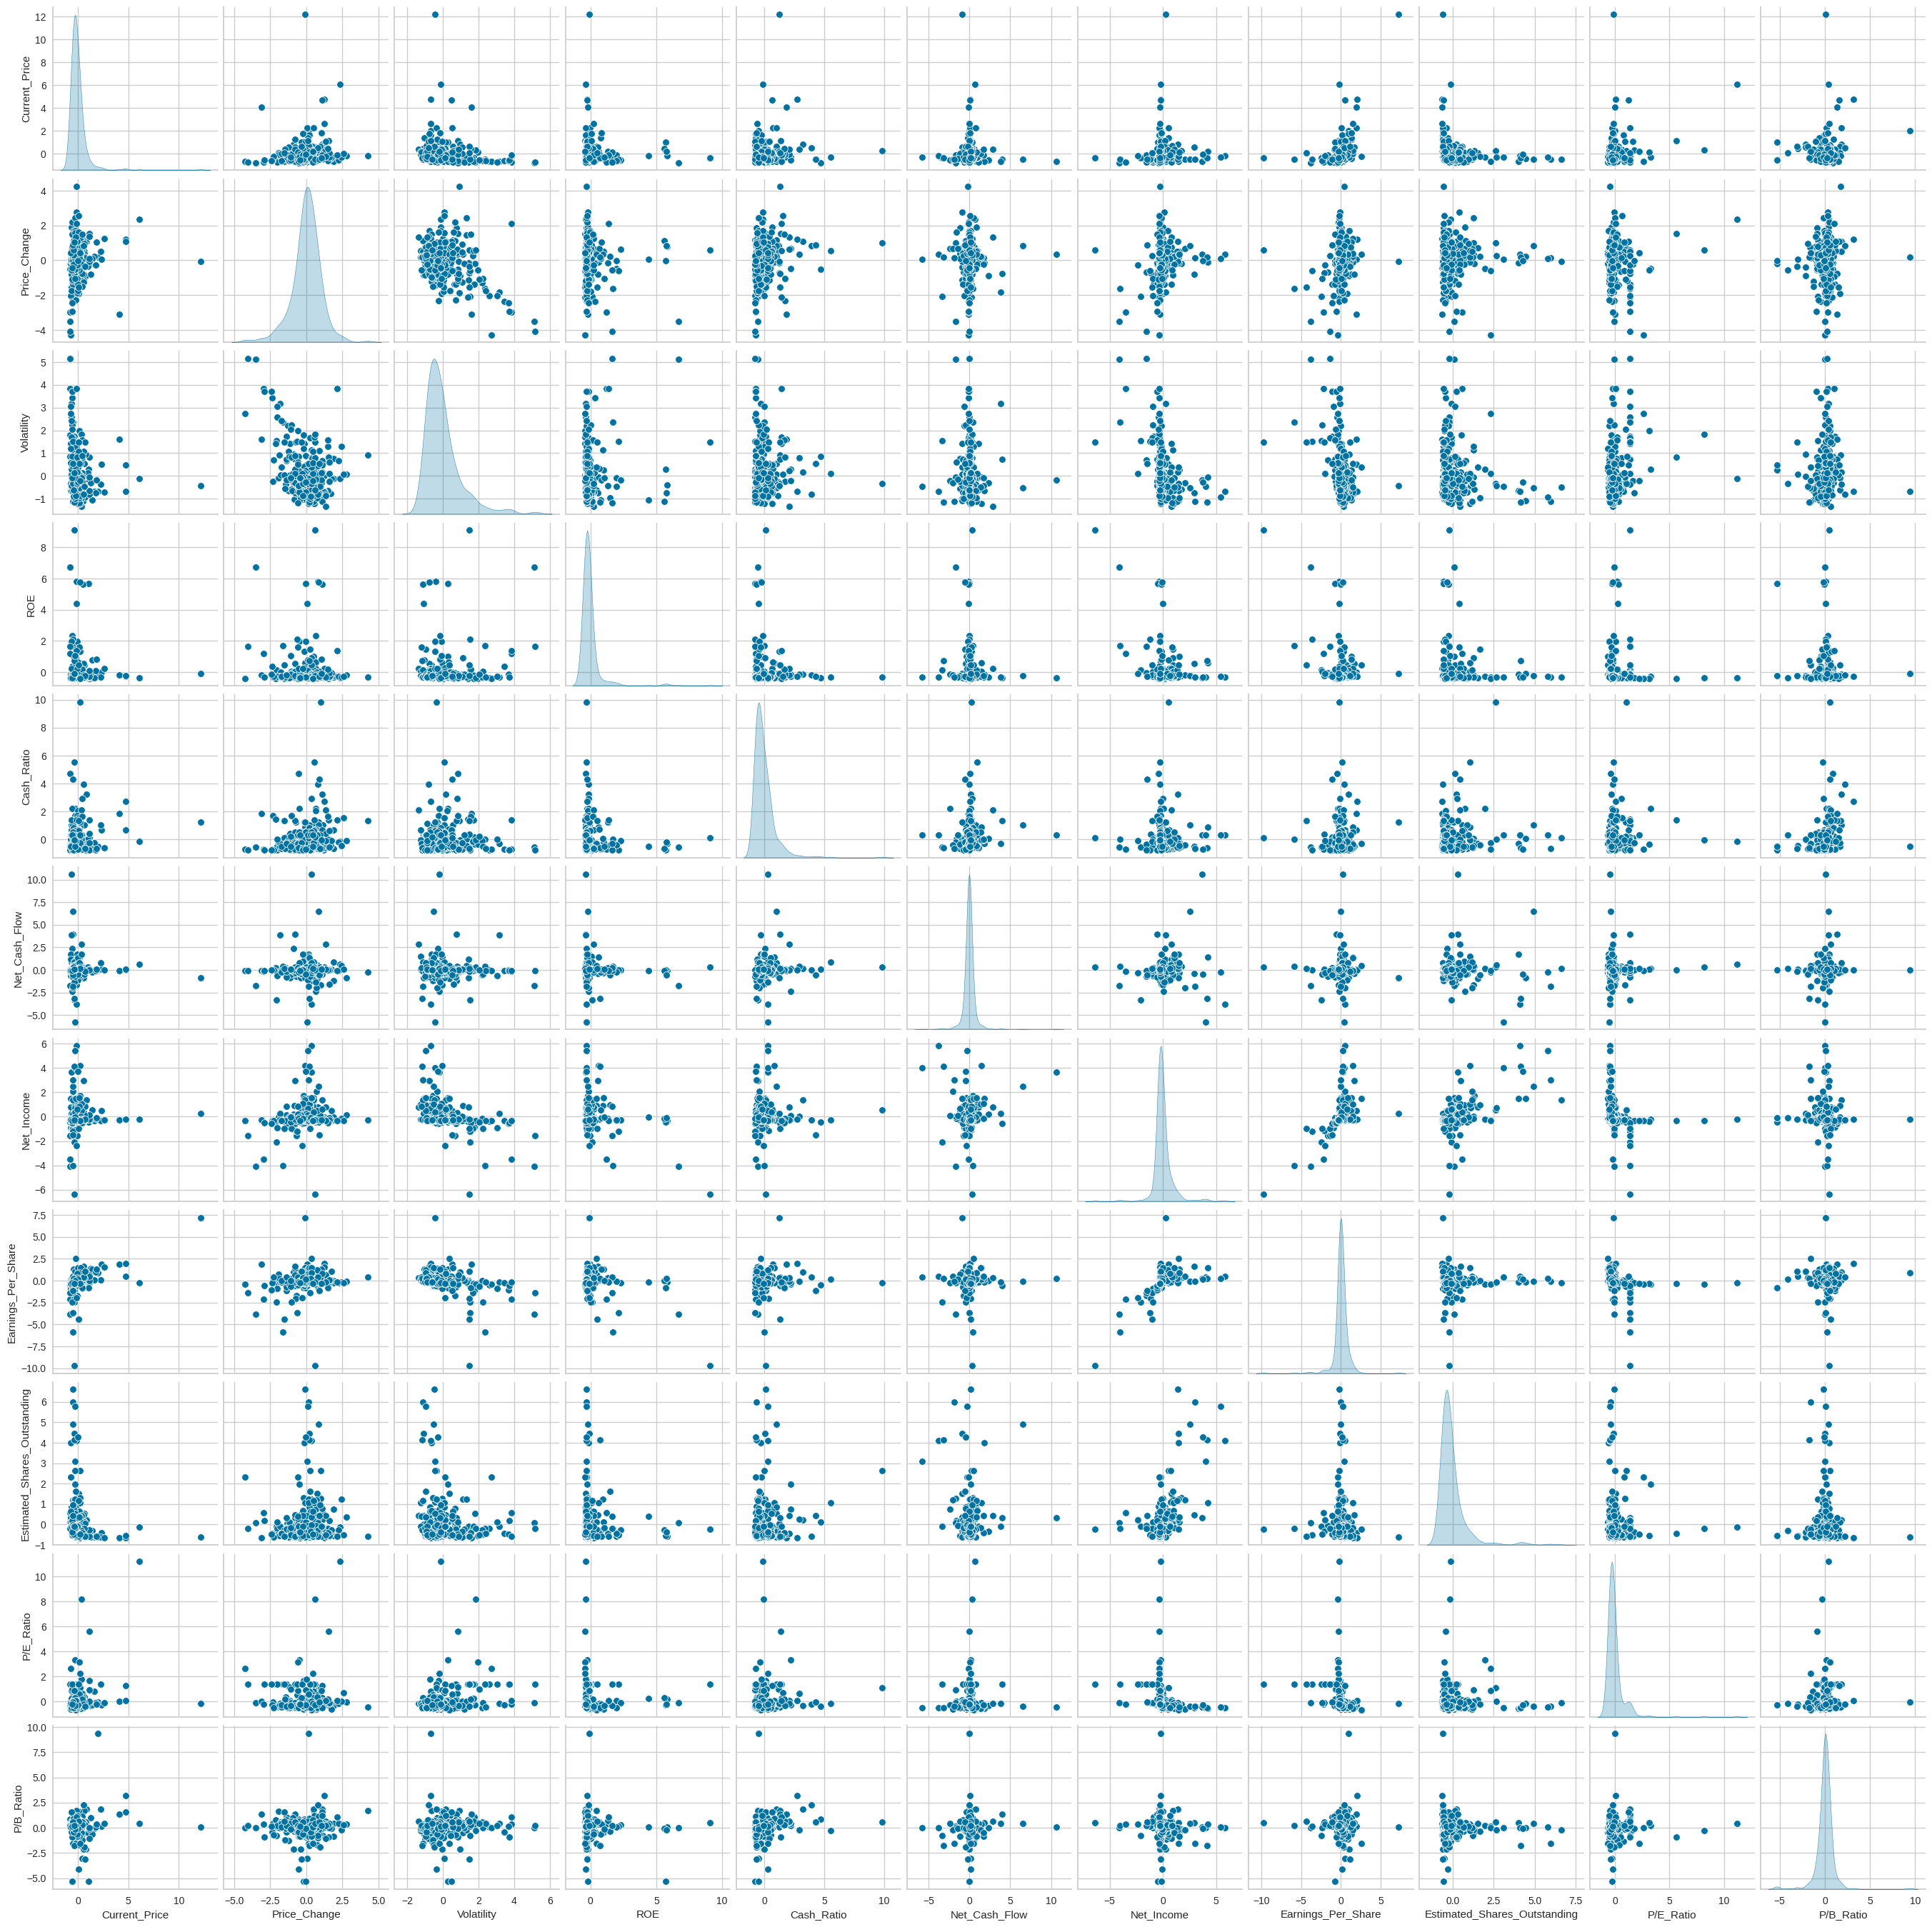

In [45]:
# Printing a pairplot of all the variables
sns.pairplot(data=subset_scaled_df, diag_kind="kde")
plt.show()

* There aren't any significant changes in the data.
* We will not perform EDA further.

## K-means Clustering

* Now, we will use K-Means clustering to group data based on their attribute. First, we need to determine the optimal number of groups. For that we conduct the knee test to see where the knee happens.

In [46]:
# Making a copy of the scaled data to work on K-means clustering
scaled_kmeans = subset_scaled_df.copy()

### Elbow plot

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2603612005599585
Number of Clusters: 4 	Average Distortion: 2.1822426161442072
Number of Clusters: 5 	Average Distortion: 2.108708268456352
Number of Clusters: 6 	Average Distortion: 2.074356704947458
Number of Clusters: 7 	Average Distortion: 2.0049396373681247
Number of Clusters: 8 	Average Distortion: 1.9893285845489175
Number of Clusters: 9 	Average Distortion: 1.9334093216840613


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

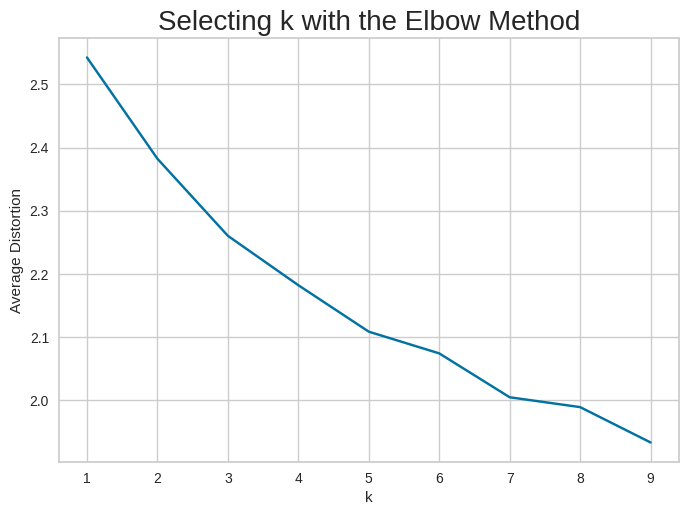

In [47]:
# Finding optimal number of clusters
clusters = range(1, 10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(scaled_kmeans)
    prediction = model.predict(scaled_kmeans)
    distortion = (
        sum(
            np.min(cdist(scaled_kmeans, model.cluster_centers_, "euclidean"), axis=1)
        )
        / scaled_kmeans.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

* Appropriate values for K seem to be between 3 and 5 where the bend decreases significantly in the elbow curve.
* Let's check silhoutte scores.

### Silhouette scores

For n_clusters = 2, silhouette score is 0.43969639509980457
For n_clusters = 3, silhouette score is 0.45797710447228496
For n_clusters = 4, silhouette score is 0.45434371948348606
For n_clusters = 5, silhouette score is 0.40431919420914675
For n_clusters = 6, silhouette score is 0.3945940839310185
For n_clusters = 7, silhouette score is 0.409949650804808
For n_clusters = 8, silhouette score is 0.41676518593219936
For n_clusters = 9, silhouette score is 0.14442461112679353
For n_clusters = 10, silhouette score is 0.10919548085003278


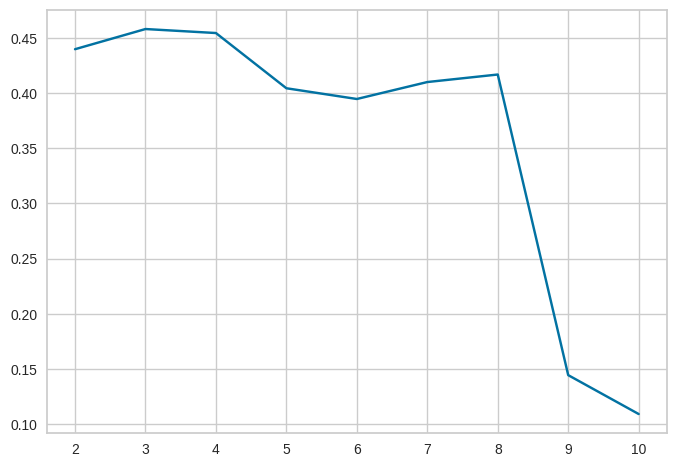

In [48]:
sil_score = []
cluster_list = list(range(2, 11))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(scaled_kmeans, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

* From the silhouette scores, 3 is higher than 4 and 5.

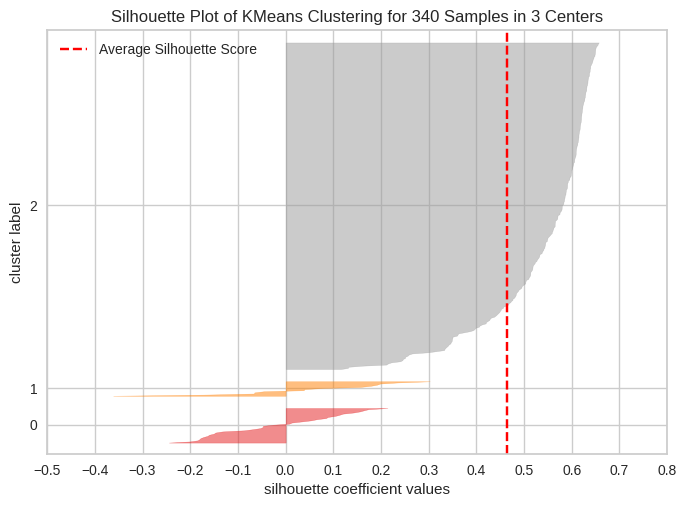

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [49]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(scaled_kmeans)
visualizer.show()

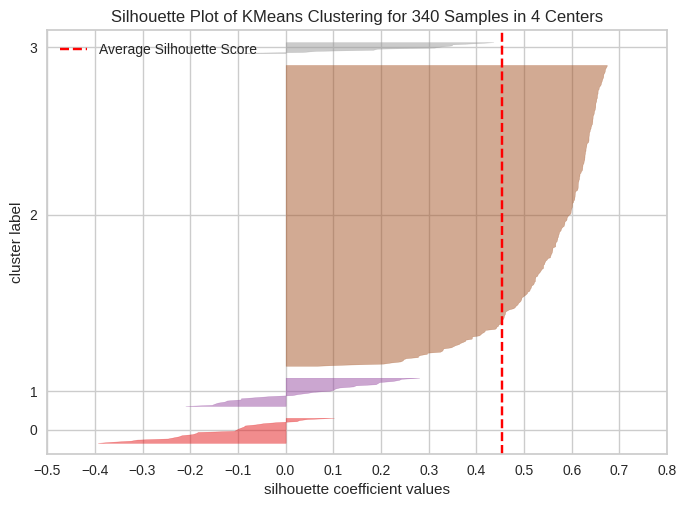

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [50]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(scaled_kmeans)
visualizer.show()

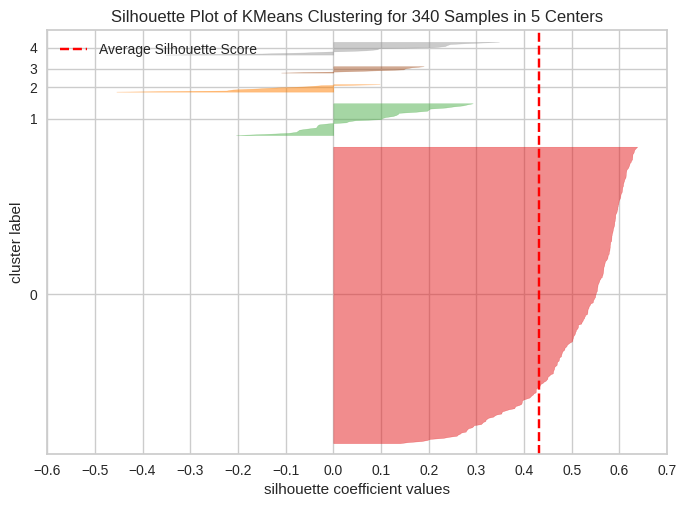

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [51]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(scaled_kmeans)
visualizer.show()

* 3 clusters has a higher silhouette score, but from the visuals 5 clusters is a more appropriate number of clusters.

### Selecting final model (k=5)

In [52]:
# Final K-means model
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(scaled_kmeans)

KMeans(n_clusters=5, random_state=1)

In [53]:
# Making another copy of original data to avoid changes and work on hierarchical clustering later
df_kmeans=df.copy()

In [54]:
# Adding kmeans cluster labels to the original copy and scaled dataframes
df_kmeans["K_means_segments"] = kmeans.labels_
scaled_kmeans["K_means_segments"] = kmeans.labels_

### Revisiting a few rows of each dataframe to visualize differences

In [55]:
# Original dataframe
df.head()

Company             GICS_Sector      GICS_Sub_Industry  \
0  American Airlines Group             Industrials               Airlines   
1                   AbbVie             Health Care        Pharmaceuticals   
2      Abbott Laboratories             Health Care  Health Care Equipment   
3        Adobe Systems Inc  Information Technology   Application Software   
4     Analog Devices, Inc.  Information Technology         Semiconductors   

   Current_Price  Price_Change  Volatility  ROE  Cash_Ratio  Net_Cash_Flow  \
0      42.349998      9.999995    1.687151  135          51     -604000000   
1      59.240002      8.339433    2.197887  130          77       51000000   
2      44.910000     11.301121    1.273646   21          67      938000000   
3      93.940002     13.977195    1.357679    9         180     -240840000   
4      55.320000     -1.827858    1.701169   14         272      315120000   

   Net_Income  Earnings_Per_Share  Estimated_Shares_Outstanding   P/E_Ratio  \
0  7610000000               11.39                  6.681299e+08    3.718174   
1  5144000000                3.15                  1.633016e+09   18.806350   
2  4423000000                2.94                  1.504422e+09   15.275510   
3   629551000                1.26                  4.996437e+08   74.555557   
4   696878000                0.31                  2.247994e+09  178.451613   

   P/B_Ratio  
0  -8.784219  
1  -8.750068  
2  -0.394171  
3   4.199651  
4   1.059810

In [56]:
# Original data with cluster segment according to Kmeans
df_kmeans.head()

Company             GICS_Sector      GICS_Sub_Industry  \
0  American Airlines Group             Industrials               Airlines   
1                   AbbVie             Health Care        Pharmaceuticals   
2      Abbott Laboratories             Health Care  Health Care Equipment   
3        Adobe Systems Inc  Information Technology   Application Software   
4     Analog Devices, Inc.  Information Technology         Semiconductors   

   Current_Price  Price_Change  Volatility  ROE  Cash_Ratio  Net_Cash_Flow  \
0      42.349998      9.999995    1.687151  135          51     -604000000   
1      59.240002      8.339433    2.197887  130          77       51000000   
2      44.910000     11.301121    1.273646   21          67      938000000   
3      93.940002     13.977195    1.357679    9         180     -240840000   
4      55.320000     -1.827858    1.701169   14         272      315120000   

   Net_Income  Earnings_Per_Share  Estimated_Shares_Outstanding   P/E_Ratio  \
0  7610000000               11.39                  6.681299e+08    3.718174   
1  5144000000                3.15                  1.633016e+09   18.806350   
2  4423000000                2.94                  1.504422e+09   15.275510   
3   629551000                1.26                  4.996437e+08   74.555557   
4   696878000                0.31                  2.247994e+09  178.451613   

   P/B_Ratio  K_means_segments  
0  -8.784219                 0  
1  -8.750068                 0  
2  -0.394171                 0  
3   4.199651                 0  
4   1.059810                 1

In [57]:
# Looking at the scaled dataframe
subset_scaled_df.head()

Current_Price  Price_Change  Volatility       ROE  Cash_Ratio  \
0      -0.393341      0.493950    0.272749  0.989601   -0.210698   
1      -0.220837      0.355439    1.137045  0.937737    0.077269   
2      -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3       0.133567      0.825696   -0.284802 -0.317379    1.218059   
4      -0.260874     -0.492636    0.296470 -0.265515    2.237018   

   Net_Cash_Flow  Net_Income  Earnings_Per_Share  \
0      -0.339355    1.554415            1.309399   
1      -0.002335    0.927628            0.056755   
2       0.454058    0.744371            0.024831   
3      -0.152497   -0.219816           -0.230563   
4       0.133564   -0.202703           -0.374982   

   Estimated_Shares_Outstanding  P/E_Ratio  P/B_Ratio  
0                      0.107863  -0.652487  -0.506653  
1                      1.250274  -0.311769  -0.504205  
2                      1.098021  -0.391502   0.094941  
3                     -0.091622   0.947148   0.424333  
4                      1.978399   3.293307   0.199196

In [58]:
# Scaled dataframe with cluster segment in Kmeans
scaled_kmeans.head()

Current_Price  Price_Change  Volatility       ROE  Cash_Ratio  \
0      -0.393341      0.493950    0.272749  0.989601   -0.210698   
1      -0.220837      0.355439    1.137045  0.937737    0.077269   
2      -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3       0.133567      0.825696   -0.284802 -0.317379    1.218059   
4      -0.260874     -0.492636    0.296470 -0.265515    2.237018   

   Net_Cash_Flow  Net_Income  Earnings_Per_Share  \
0      -0.339355    1.554415            1.309399   
1      -0.002335    0.927628            0.056755   
2       0.454058    0.744371            0.024831   
3      -0.152497   -0.219816           -0.230563   
4       0.133564   -0.202703           -0.374982   

   Estimated_Shares_Outstanding  P/E_Ratio  P/B_Ratio  K_means_segments  
0                      0.107863  -0.652487  -0.506653                 0  
1                      1.250274  -0.311769  -0.504205                 0  
2                      1.098021  -0.391502   0.094941                 0  
3                     -0.091622   0.947148   0.424333                 0  
4                      1.978399   3.293307   0.199196                 1

### Cluster profiling

In [59]:
# Group data by cluster label
kmeans_profile = df_kmeans.groupby("K_means_segments").mean(numeric_only=True)

In [60]:
# Add column with counts of companies/stocks in each cluster
kmeans_profile["count_in_each_segments"] = (
    df_kmeans.groupby("K_means_segments")["Company"].count().values
)

In [61]:
# Checking the companies in each cluster
for cl in df_kmeans["K_means_segments"].unique():
    print(
        "The",
        df_kmeans[df_kmeans["K_means_segments"] == cl]["Company"].nunique(),
        "companies in cluster",
        cl,
        "are:",
    )
    print(df_kmeans[df_kmeans["K_means_segments"] == cl]["Company"].unique())
    print("-" * 100, "\n")

The 281 companies in cluster 0 are:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'AutoNation Inc' 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Limited' 'CBRE Group'
 'Crown

In [62]:
# Let's check the economic sectors in each cluster
for cl in df_kmeans["K_means_segments"].unique():
    print(
        "The",
        df_kmeans[df_kmeans["K_means_segments"] == cl]["GICS_Sector"].nunique(),
        "economic sectors in cluster",
        cl,
        "are:",
    )
    print(df_kmeans[df_kmeans["K_means_segments"] == cl]["GICS_Sector"].unique())
    print("-" * 100, "\n")

The 11 economic sectors in cluster 0 are:
['Industrials' 'Health Care' 'Information Technology' 'Consumer Staples'
 'Utilities' 'Financials' 'Real Estate' 'Materials'
 'Consumer Discretionary' 'Telecommunications Services' 'Energy']
---------------------------------------------------------------------------------------------------- 

The 6 economic sectors in cluster 1 are:
['Information Technology' 'Health Care' 'Energy' 'Materials' 'Industrials'
 'Consumer Discretionary']
---------------------------------------------------------------------------------------------------- 

The 4 economic sectors in cluster 2 are:
['Information Technology' 'Consumer Discretionary' 'Real Estate'
 'Health Care']
---------------------------------------------------------------------------------------------------- 

The 5 economic sectors in cluster 3 are:
['Industrials' 'Energy' 'Consumer Discretionary' 'Consumer Staples'
 'Financials']
---------------------------------------------------------------------

* All Utilities stocks are in cluster 0.
* Cluster 0 has stocks from all economic sectors.
* Economic sectors are spread across all clusters.
* Let's check exactly how many stocks of each economic sector are in the clusters.

In [63]:
# Looking at the amount of economic sectors in each cluster
df_kmeans.groupby(["K_means_segments", "GICS_Sector"])["Company"].count()

K_means_segments  GICS_Sector                
0                 Consumer Discretionary         34
                  Consumer Staples               16
                  Energy                          5
                  Financials                     44
                  Health Care                    34
                  Industrials                    51
                  Information Technology         26
                  Materials                      18
                  Real Estate                    26
                  Telecommunications Services     3
                  Utilities                      24
1                 Consumer Discretionary          1
                  Energy                         22
                  Health Care                     1
                  Industrials                     1
                  Information Technology          4
                  Materials                       2
2                 Consumer Discretionary          3
                  Health Care                     2
                  Information Technology          2
                  Real Estate                     1
3                 Consumer Discretionary          1
                  Consumer Staples                2
                  Energy                          2
                  Financials                      1
                  Industrials                     1
4                 Consumer Discretionary          1
                  Consumer Staples                1
                  Energy                          1
                  Financials                      4
                  Health Care                     3
                  Information Technology          1
                  Telecommunications Services     2
Name: Company, dtype: int64

* Most Energy stocks are in cluster 1.
* The rest of stocks are predominantly in cluster 0.

In [64]:
# Display cluster profiles
kmeans_profile.style.highlight_max(color="lightgreen", axis=0)

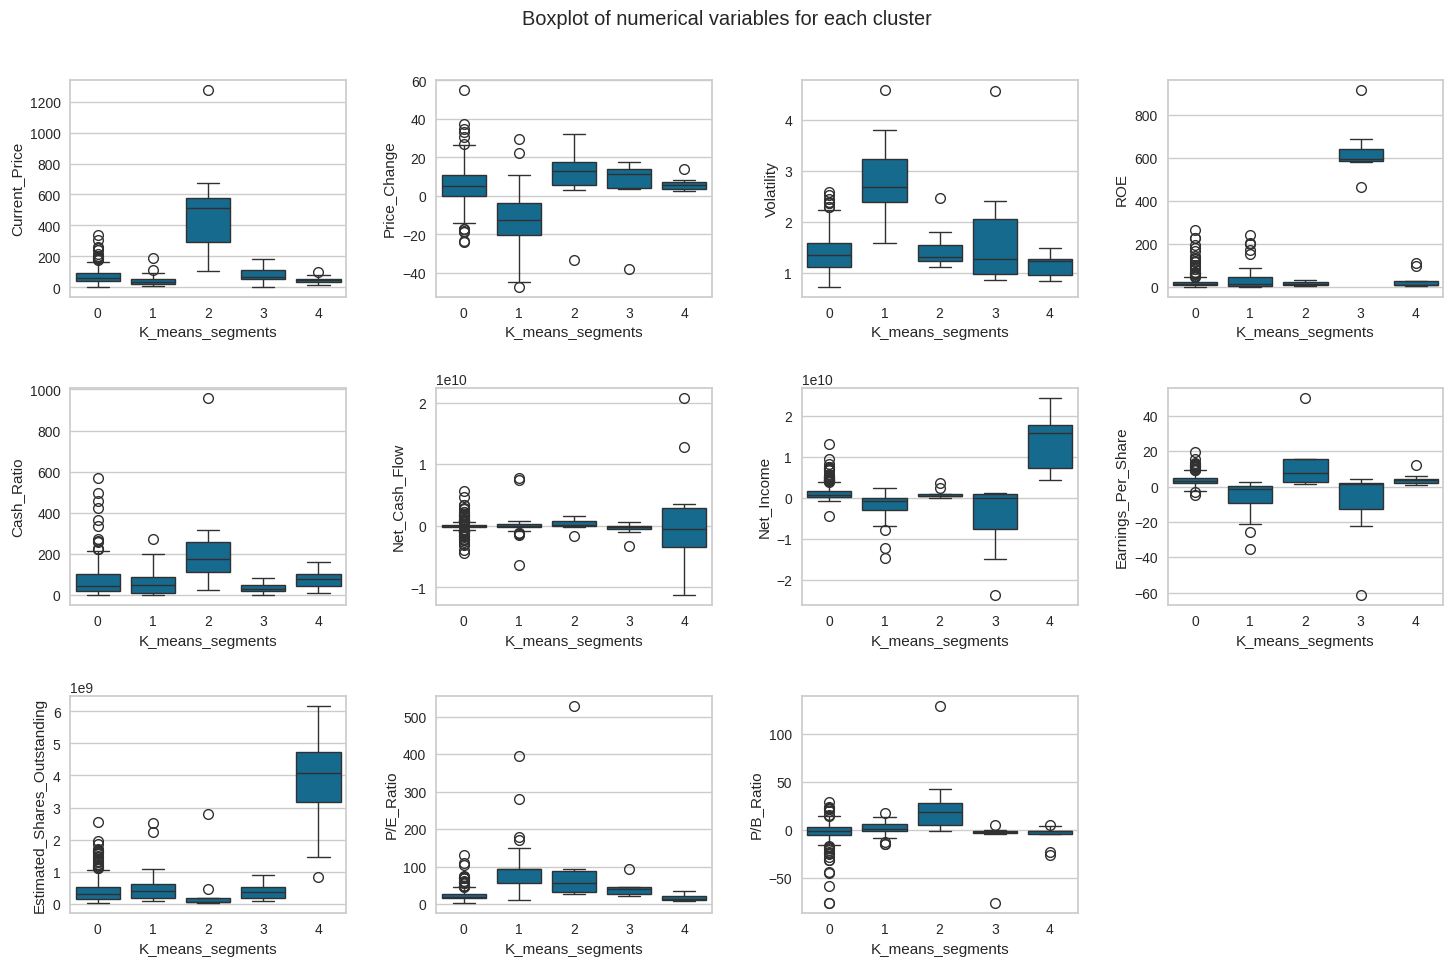

In [65]:
# Creating visuals of all numerical values and clusters
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df_kmeans, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0)

### Insights

* **Cluster 0:**
  * There are 281 companies and 11 economic sectors.
  * All Utilities stocks are in this cluster.
  * There is a wider variety of values in this cluster due to the high quantity of companies. There are many outliers on all variables.
* **Cluster 1:**
  * There are 31 companies and 6 economic sectors.
  * Most energy stocks are in this cluster.
  * Cluster 1 has the highest volatility average at ~2.77 and the cheapest current prices for stocks.
* **Cluster 2:**
  * There are 8 companies and 4 economic sectors.
  * Highest current prices and price increase of stocks as well as cash ratio, earnings per share, P/E ratio, and P/B ratio.
* **Cluster 3:**
  * There are 7 companies and 5 economic sectors.
  * Companies with the highest ROE are in this cluster.
  * It's the only cluster with many negative values (Net cash flow, Net income, Earnings per share, and P/B value)
* **Cluster 4:**
  * There are 13 companies and 7 economic sectors.
  * Companies in this cluster have the highest net cash flow, net income, and estimated shares outstanding. Wealthier companies are in this cluster.
  * Current price for stocks is cheaper in this cluster, but the overall price increased around 6.


## Hierarchical Clustering

In [66]:
# Creating a new dataframe of scaled data for hierarchical clustering
scaled_hc = subset_scaled_df.copy()

### Checking cophenetic correlation

In [67]:
# List of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# List of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(scaled_hc, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(scaled_hc))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

In [68]:
# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


**Exploring different linkage methods with Euclidean distance only.**

In [69]:
# List of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(scaled_hc, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(scaled_hc))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


In [70]:
# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


* The highest cophenetic correlation is with Euclidean distance and average linkage.
* Chebyshev distance and average linkage also gave a high cophenetic correlation.

###Checking dendrograms

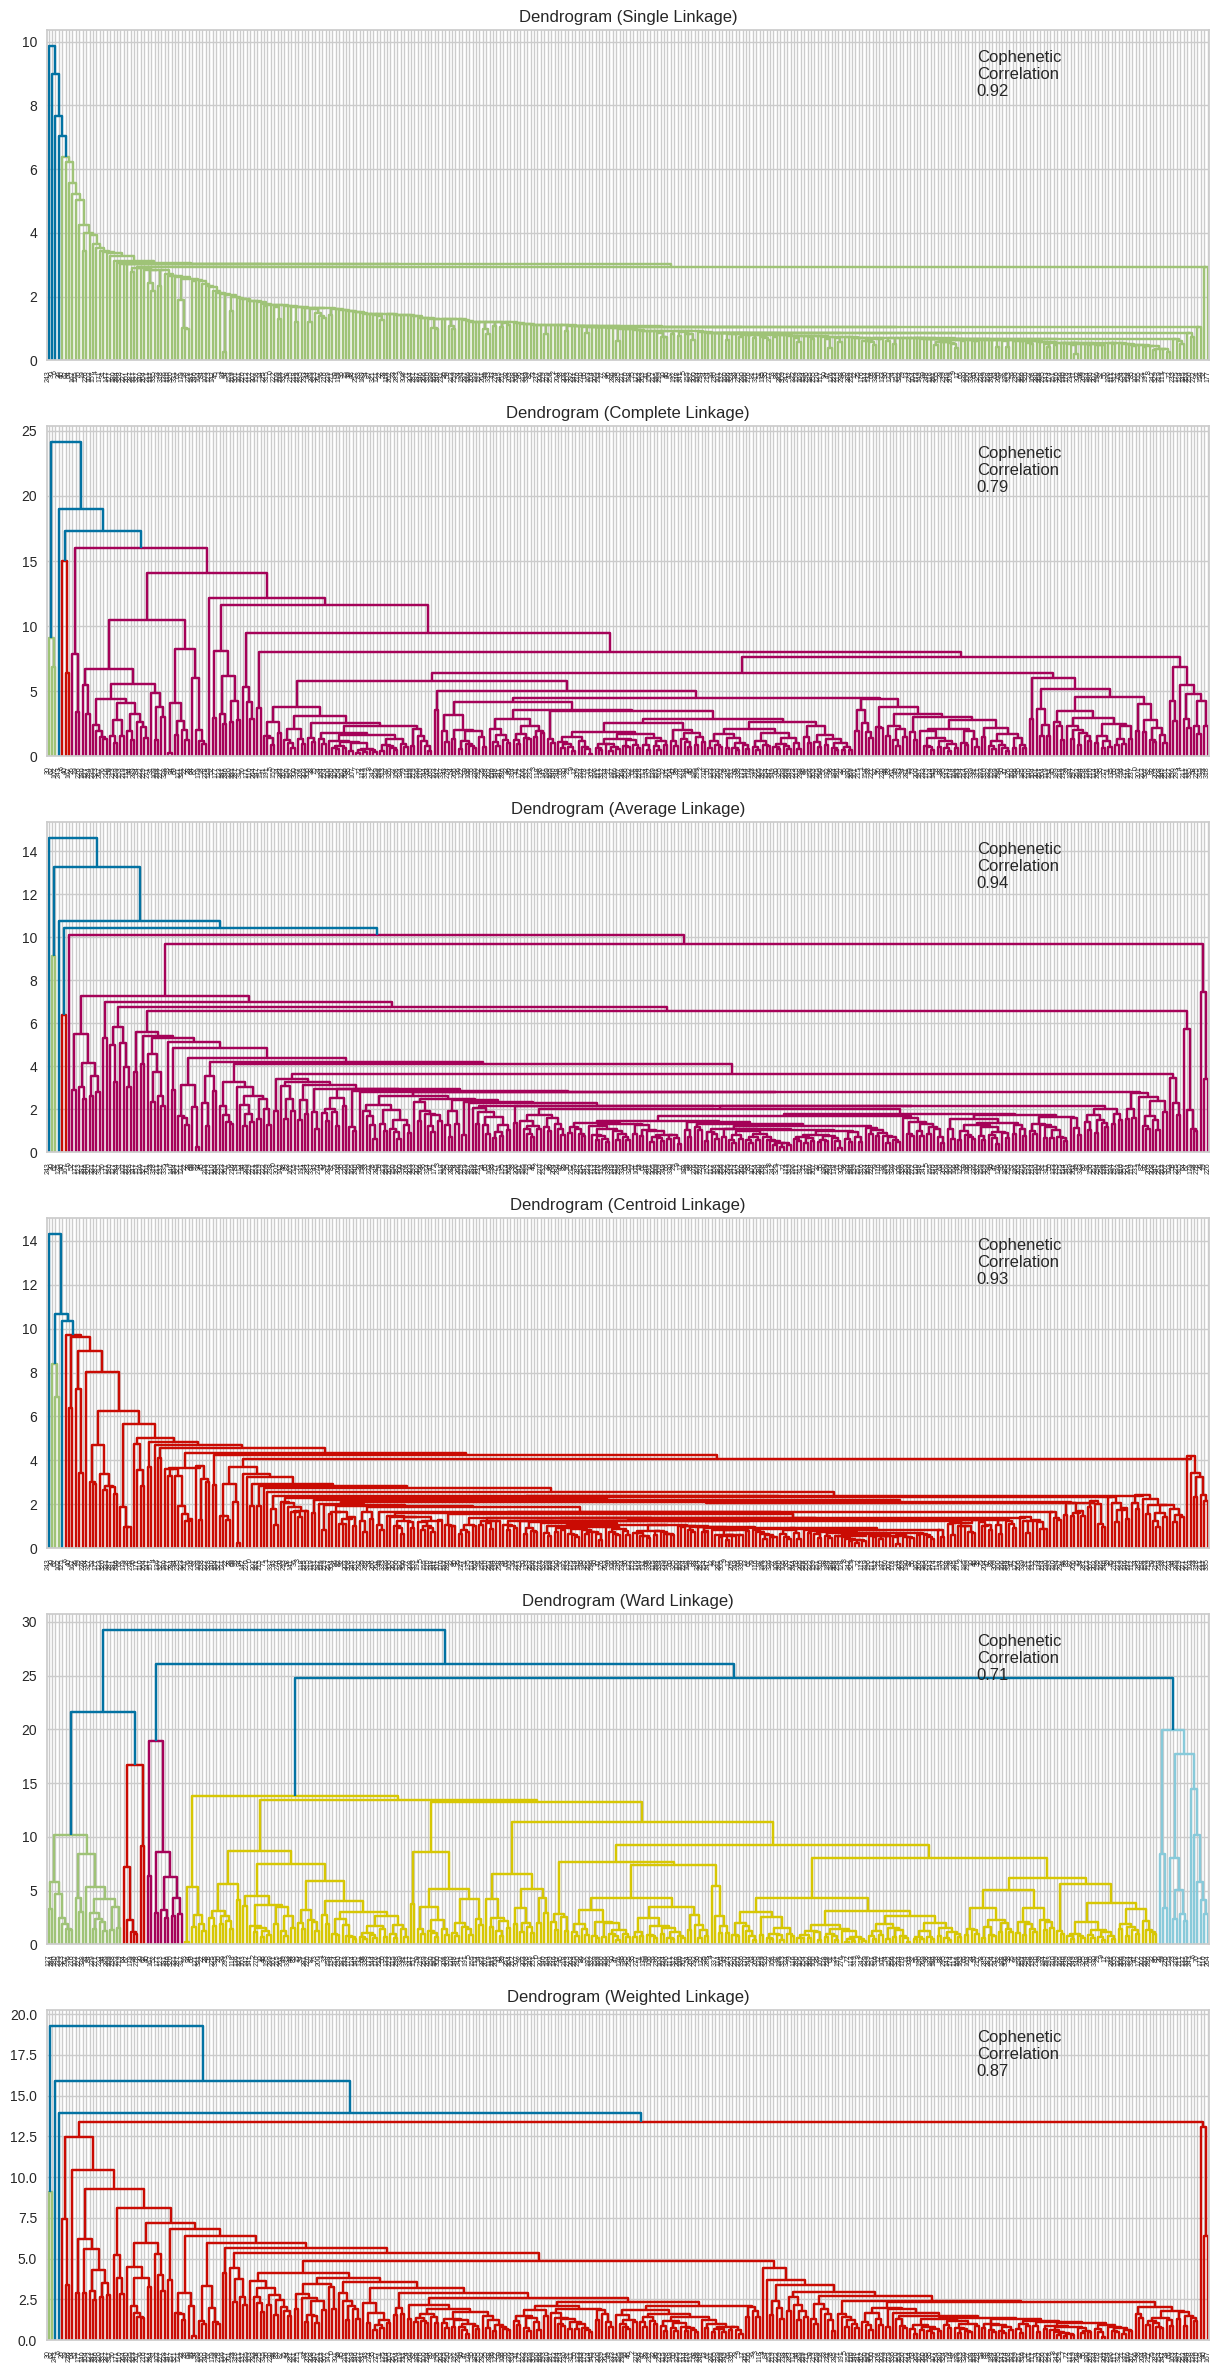

In [71]:
# List of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# Creating a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(scaled_hc, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(scaled_hc))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

* Cophenetic correlation is highest with centroid and average linkage.
* Ward linkage gives more distinct clusters and a good cophenetic correlation of 71%.
* 5 would be an appropriate amount of clusters from the dendrogram with ward linkage.

### Selecting final model (5 clusters)

In [72]:
# Final hierarchical model
HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
HCmodel.fit(scaled_hc)

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [73]:
# Making another copy of original data to avoid changes
df_hc=df.copy()

In [74]:
# Adding hierarchical cluster labels to the original and scaled dataframes
df_hc["HC_Clusters"] = HCmodel.labels_
scaled_hc["HC_Clusters"] = HCmodel.labels_

### Looking at a few rows of each dataframe to visualize differences

In [75]:
# Original dataframe
df.head()

Company             GICS_Sector      GICS_Sub_Industry  \
0  American Airlines Group             Industrials               Airlines   
1                   AbbVie             Health Care        Pharmaceuticals   
2      Abbott Laboratories             Health Care  Health Care Equipment   
3        Adobe Systems Inc  Information Technology   Application Software   
4     Analog Devices, Inc.  Information Technology         Semiconductors   

   Current_Price  Price_Change  Volatility  ROE  Cash_Ratio  Net_Cash_Flow  \
0      42.349998      9.999995    1.687151  135          51     -604000000   
1      59.240002      8.339433    2.197887  130          77       51000000   
2      44.910000     11.301121    1.273646   21          67      938000000   
3      93.940002     13.977195    1.357679    9         180     -240840000   
4      55.320000     -1.827858    1.701169   14         272      315120000   

   Net_Income  Earnings_Per_Share  Estimated_Shares_Outstanding   P/E_Ratio  \
0  7610000000               11.39                  6.681299e+08    3.718174   
1  5144000000                3.15                  1.633016e+09   18.806350   
2  4423000000                2.94                  1.504422e+09   15.275510   
3   629551000                1.26                  4.996437e+08   74.555557   
4   696878000                0.31                  2.247994e+09  178.451613   

   P/B_Ratio  
0  -8.784219  
1  -8.750068  
2  -0.394171  
3   4.199651  
4   1.059810

In [76]:
# Original data with cluster segment according to hierarchical clustering
df_hc.head()

Company             GICS_Sector      GICS_Sub_Industry  \
0  American Airlines Group             Industrials               Airlines   
1                   AbbVie             Health Care        Pharmaceuticals   
2      Abbott Laboratories             Health Care  Health Care Equipment   
3        Adobe Systems Inc  Information Technology   Application Software   
4     Analog Devices, Inc.  Information Technology         Semiconductors   

   Current_Price  Price_Change  Volatility  ROE  Cash_Ratio  Net_Cash_Flow  \
0      42.349998      9.999995    1.687151  135          51     -604000000   
1      59.240002      8.339433    2.197887  130          77       51000000   
2      44.910000     11.301121    1.273646   21          67      938000000   
3      93.940002     13.977195    1.357679    9         180     -240840000   
4      55.320000     -1.827858    1.701169   14         272      315120000   

   Net_Income  Earnings_Per_Share  Estimated_Shares_Outstanding   P/E_Ratio  \
0  7610000000               11.39                  6.681299e+08    3.718174   
1  5144000000                3.15                  1.633016e+09   18.806350   
2  4423000000                2.94                  1.504422e+09   15.275510   
3   629551000                1.26                  4.996437e+08   74.555557   
4   696878000                0.31                  2.247994e+09  178.451613   

   P/B_Ratio  HC_Clusters  
0  -8.784219            3  
1  -8.750068            3  
2  -0.394171            3  
3   4.199651            3  
4   1.059810            3

In [77]:
# Looking at the scaled dataframe
subset_scaled_df.head()

Current_Price  Price_Change  Volatility       ROE  Cash_Ratio  \
0      -0.393341      0.493950    0.272749  0.989601   -0.210698   
1      -0.220837      0.355439    1.137045  0.937737    0.077269   
2      -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3       0.133567      0.825696   -0.284802 -0.317379    1.218059   
4      -0.260874     -0.492636    0.296470 -0.265515    2.237018   

   Net_Cash_Flow  Net_Income  Earnings_Per_Share  \
0      -0.339355    1.554415            1.309399   
1      -0.002335    0.927628            0.056755   
2       0.454058    0.744371            0.024831   
3      -0.152497   -0.219816           -0.230563   
4       0.133564   -0.202703           -0.374982   

   Estimated_Shares_Outstanding  P/E_Ratio  P/B_Ratio  
0                      0.107863  -0.652487  -0.506653  
1                      1.250274  -0.311769  -0.504205  
2                      1.098021  -0.391502   0.094941  
3                     -0.091622   0.947148   0.424333  
4                      1.978399   3.293307   0.199196

In [78]:
# Scaled dataframe with cluster segment in hierarchical clustering
scaled_hc.head()

Current_Price  Price_Change  Volatility       ROE  Cash_Ratio  \
0      -0.393341      0.493950    0.272749  0.989601   -0.210698   
1      -0.220837      0.355439    1.137045  0.937737    0.077269   
2      -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3       0.133567      0.825696   -0.284802 -0.317379    1.218059   
4      -0.260874     -0.492636    0.296470 -0.265515    2.237018   

   Net_Cash_Flow  Net_Income  Earnings_Per_Share  \
0      -0.339355    1.554415            1.309399   
1      -0.002335    0.927628            0.056755   
2       0.454058    0.744371            0.024831   
3      -0.152497   -0.219816           -0.230563   
4       0.133564   -0.202703           -0.374982   

   Estimated_Shares_Outstanding  P/E_Ratio  P/B_Ratio  HC_Clusters  
0                      0.107863  -0.652487  -0.506653            3  
1                      1.250274  -0.311769  -0.504205            3  
2                      1.098021  -0.391502   0.094941            3  
3                     -0.091622   0.947148   0.424333            3  
4                      1.978399   3.293307   0.199196            3

###Cluster profiling

In [79]:
# Group data by cluster label
hc_profile = df_hc.groupby("HC_Clusters").mean(numeric_only=True)

In [80]:
# Add column with counts of companies/stocks in each cluster
hc_profile["count_in_each_segments"] = (
    df_hc.groupby("HC_Clusters")["Company"].count().values
)

In [81]:
# Checking the companies in each cluster
for cl in df_hc["HC_Clusters"].unique():
    print(
        "The",
        df_hc[df_hc["HC_Clusters"] == cl]["Company"].nunique(),
        "companies in cluster",
        cl,
        "are:",
    )
    print(df_hc[df_hc["HC_Clusters"] == cl]["Company"].unique())
    print("-" * 100, "\n")

The 285 companies in cluster 3 are:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Limited' 'CBRE Gro

In [82]:
# Let's check the economic sectors in each cluster
for cl in df_hc["HC_Clusters"].unique():
    print(
        "The",
        df_hc[df_hc["HC_Clusters"] == cl]["GICS_Sector"].nunique(),
        "economic sectors in cluster",
        cl,
        "are:",
    )
    print(df_hc[df_hc["HC_Clusters"] == cl]["GICS_Sector"].unique())
    print("-" * 100, "\n")

The 11 economic sectors in cluster 3 are:
['Industrials' 'Health Care' 'Information Technology' 'Consumer Staples'
 'Utilities' 'Financials' 'Real Estate' 'Materials'
 'Consumer Discretionary' 'Telecommunications Services' 'Energy']
---------------------------------------------------------------------------------------------------- 

The 6 economic sectors in cluster 0 are:
['Information Technology' 'Health Care' 'Consumer Discretionary'
 'Real Estate' 'Telecommunications Services' 'Consumer Staples']
---------------------------------------------------------------------------------------------------- 

The 5 economic sectors in cluster 1 are:
['Industrials' 'Energy' 'Consumer Discretionary' 'Consumer Staples'
 'Financials']
---------------------------------------------------------------------------------------------------- 

The 3 economic sectors in cluster 4 are:
['Energy' 'Materials' 'Information Technology']
--------------------------------------------------------------------------

* All Utilities sector is in cluster 3.
* Cluster 3 has companies from all economic sectors.
* Economic sectors are distributed through all clusters.
* Let's check exactly how many companies of each sector are in each cluster.

In [83]:
# Checking the counts of economic sectors in each cluster
df_hc.groupby(["HC_Clusters", "GICS_Sector"])["Company"].count()

HC_Clusters  GICS_Sector                
0            Consumer Discretionary          3
             Consumer Staples                1
             Health Care                     5
             Information Technology          4
             Real Estate                     1
             Telecommunications Services     1
1            Consumer Discretionary          1
             Consumer Staples                2
             Energy                          2
             Financials                      1
             Industrials                     1
2            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     1
             Information Technology          1
             Telecommunications Services     2
3            Consumer Discretionary         35
             Consumer Staples               15
             Energy                          7
             Financials                     44
             Health Care                    34
             Industrials                    52
             Information Technology         27
             Materials                      19
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
4            Energy                         20
             Information Technology          1
             Materials                       1
Name: Company, dtype: int64

* Cluster 4 is comprised mainly of Energy companies. There are more Energy stocks in cluster 4 than 3 (20 and 7 respectively).
* Cluster 1 only has 1 or 2 stocks per sector.

In [84]:
# Display cluster profiles
hc_profile.style.highlight_max(color="lightgreen", axis=0)

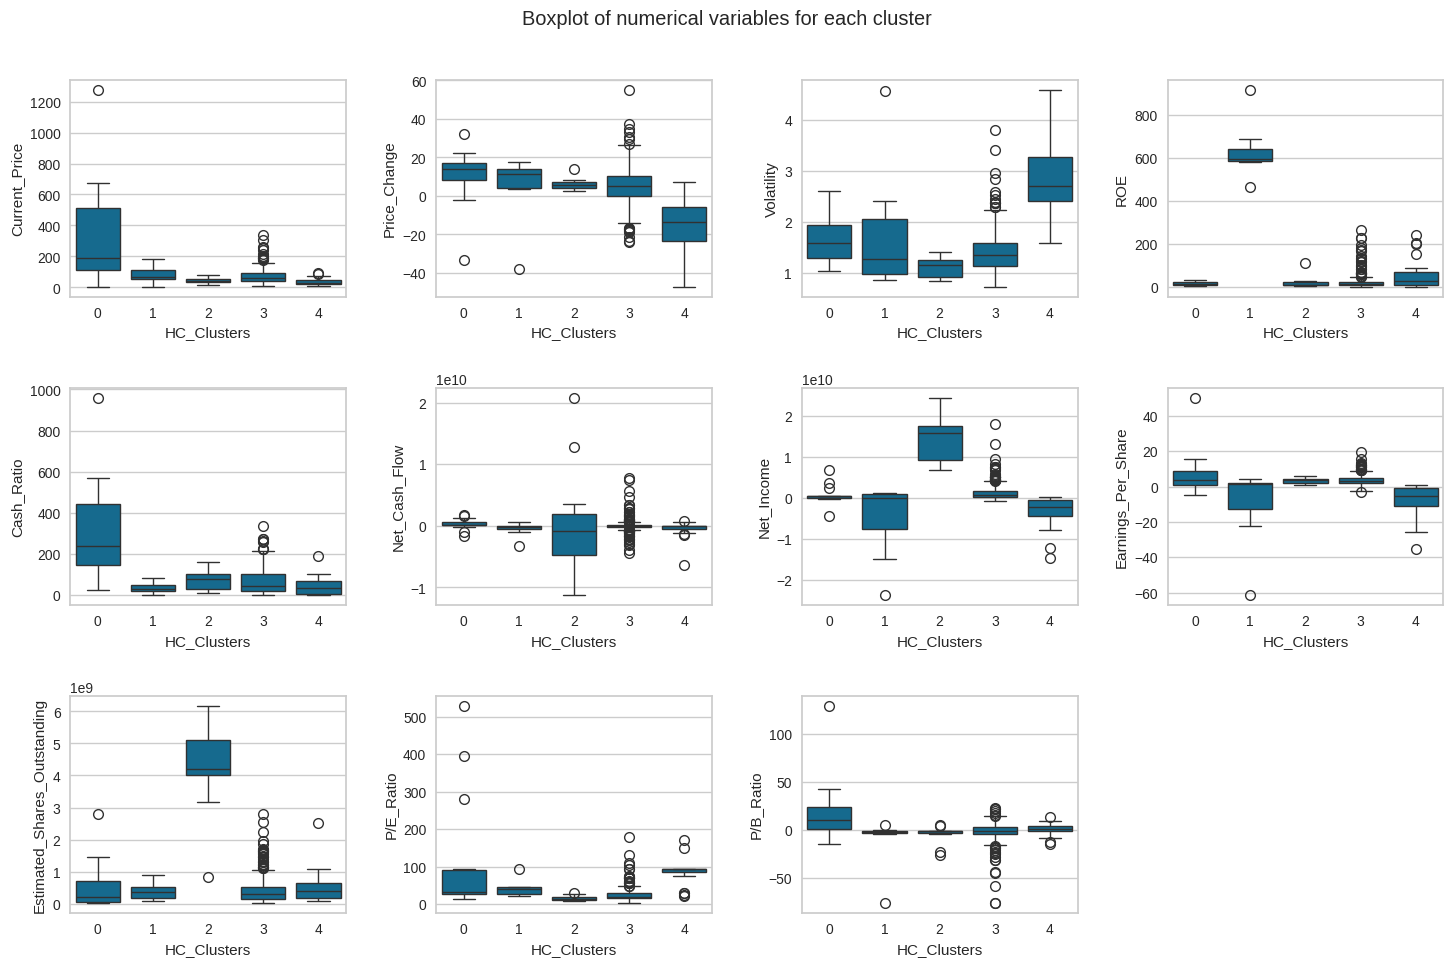

In [85]:
# Creating visuals of all numerical values and clusters
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df_hc, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

### Insights

* **Cluster 0:**
  * There are 15 companies and 6 economic sectors.
  * Many of the highest values are on this cluster, including price, cash ratio, and earnings per share.
  * Current price is much higher (~326) as compared to all other clusters.
* **Cluster 1:**
  * There are 7 companies and 5 economic sectors.
  * This cluster has significantly higher ROE compared to the other clusters, but negtive values on many variables (Net cash flow, Net income, Earnings per share, and P/B ratio).
* **Cluster 2:**
  * There are 11 companies and 7 economic sectors.
  * Volatility is very low with high net cash flow, net income, and estimated shares outstanding. This cluster could be comprised by wealthier companies.
* **Cluster 3:**
  * There are 285 companies and 11 economic sectors.
  * There are many outliers on all variables that could be due to the high amount of stocks in this cluster.
  * All Utilities companies are in this cluster.
* **Cluster 4:**
  * There are 22 companies and 3 economic sectors.
  * Volatility is highest in this cluster.
  * Stocks in this cluster show asignificant price decrease and earnings per share.
  * This cluster is comprised mainly on Energy companies.


## Dimensionality reduction using PCA for visualization

In [86]:
# Looking at the first 5 rows of scaled data
subset_scaled_df.head()

Current_Price  Price_Change  Volatility       ROE  Cash_Ratio  \
0      -0.393341      0.493950    0.272749  0.989601   -0.210698   
1      -0.220837      0.355439    1.137045  0.937737    0.077269   
2      -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3       0.133567      0.825696   -0.284802 -0.317379    1.218059   
4      -0.260874     -0.492636    0.296470 -0.265515    2.237018   

   Net_Cash_Flow  Net_Income  Earnings_Per_Share  \
0      -0.339355    1.554415            1.309399   
1      -0.002335    0.927628            0.056755   
2       0.454058    0.744371            0.024831   
3      -0.152497   -0.219816           -0.230563   
4       0.133564   -0.202703           -0.374982   

   Estimated_Shares_Outstanding  P/E_Ratio  P/B_Ratio  
0                      0.107863  -0.652487  -0.506653  
1                      1.250274  -0.311769  -0.504205  
2                      1.098021  -0.391502   0.094941  
3                     -0.091622   0.947148   0.424333  
4                      1.978399   3.293307   0.199196

In [87]:
# Computing the covariance matrix
covMatrix = np.cov(subset_scaled_df,rowvar=False)
print(covMatrix)

[[ 1.00294985e+00  1.35379678e-01 -1.24623162e-01 -5.51076941e-04
   1.28193172e-01 -2.20255018e-02  3.67332609e-02  4.81018703e-01
  -1.45735035e-01  2.61040375e-01  1.25001740e-01]
 [ 1.35379678e-01  1.00294985e+00 -4.09485757e-01 -4.34381685e-02
   1.69082964e-01  2.68245310e-02  1.79826528e-01  1.75918225e-01
   3.37550438e-02 -2.49801709e-03  3.44304592e-02]
 [-1.24623162e-01 -4.09485757e-01  1.00294985e+00  1.63011319e-01
   2.06659452e-02 -1.42137739e-02 -3.84563951e-01 -3.80427812e-01
  -9.59867699e-02  2.64377469e-01  4.66653027e-02]
 [-5.51076941e-04 -4.34381685e-02  1.63011319e-01  1.00294985e+00
  -6.93260015e-02 -5.23589005e-02 -2.89375193e-01 -4.06486472e-01
  -3.03773642e-02  2.34095558e-02 -6.34048877e-02]
 [ 1.28193172e-01  1.69082964e-01  2.06659452e-02 -6.93260015e-02
   1.00294985e+00  1.14154326e-01  2.86730699e-02  2.48317919e-02
   1.36269927e-01  8.97470272e-02  2.30349368e-01]
 [-2.20255018e-02  2.68245310e-02 -1.42137739e-02 -5.23589005e-02
   1.14154326e-01  

In [88]:
pca = PCA(n_components=11)
pca.fit(subset_scaled_df)

PCA(n_components=11)

In [89]:
# Checking eigen values to calculate the percentage of variation of each component
print(pca.explained_variance_)

[2.51212401 1.58411327 1.33434149 1.11310406 1.09308721 0.95662194
 0.82731447 0.71754029 0.4845015  0.2833637  0.12633645]


In [90]:
# Checking eigen vectors
print(pca.components_)

[[-0.18335823 -0.27666842  0.42919618  0.30106508 -0.08417114 -0.03368814
  -0.51091003 -0.5033668  -0.22120756  0.20815091 -0.00991673]
 [ 0.5774047   0.18815749  0.04101083 -0.06258117  0.32773726  0.1280034
  -0.25155831  0.18433241 -0.36327549  0.37736302  0.360796  ]
 [-0.17770732  0.04646452  0.18283759  0.00473711  0.53919175  0.1855024
   0.20918754 -0.27531285  0.58166569  0.24934832  0.2959799 ]
 [-0.00900284  0.65971773 -0.38664453  0.53431652  0.0838151  -0.13655589
  -0.12101272 -0.26011429  0.02333621 -0.00303257 -0.14551133]
 [ 0.39287414 -0.12202474  0.14571667  0.12446023 -0.1588855  -0.56275703
   0.17221048  0.06902206  0.32807051  0.47228787 -0.29493986]
 [ 0.04539895  0.07374983 -0.01301984 -0.04924358 -0.1433002   0.69439441
   0.07660902 -0.02703535  0.00607268  0.39241333 -0.571456  ]
 [ 0.34597383 -0.32918961  0.06740711  0.69551664 -0.04384053  0.31995867
   0.15598116  0.16995766  0.13220581 -0.30317218  0.12940702]
 [ 0.03785302 -0.10485332  0.17805858  0.00

In [91]:
# Percentage of variation explained by each vector
print(pca.explained_variance_ratio_)

[0.22770322 0.14358674 0.120947   0.10089366 0.09907929 0.08670985
 0.0749892  0.06503908 0.04391604 0.02568457 0.01145135]


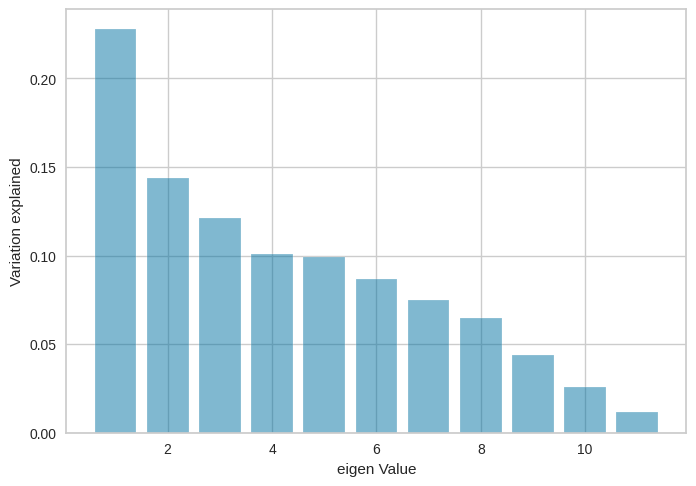

In [92]:
# Visual of variation explained by each vector
plt.bar(list(range(1,12)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

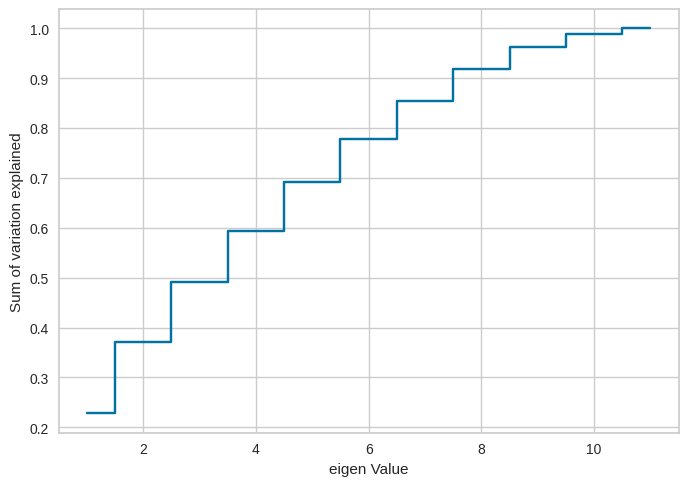

In [93]:
plt.step(list(range(1,12)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Sum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [94]:
# Setting the number of components to 2
pca = PCA(n_components=2)

# Transforming data and storing results in a dataframe
reduced_pca = pca.fit_transform(subset_scaled_df)
reduced_df_pca = pd.DataFrame(
    data=reduced_pca, columns=["Component 1", "Component 2"]
)

In [95]:
# Checking the amount of variance explained by 2 components
pca.explained_variance_ratio_.sum()

0.3712899567725855

* We reduced the dimensions from 11 to 2, and they are able to explain around 40% of total variance in the data.
* The first component explains ~23% of the variance while the second one explains ~14%.
* To explain at least 70% of the variance we would need to keep 6 vectors.
* Let's visualize it by kmeans and hierarchical clusters.

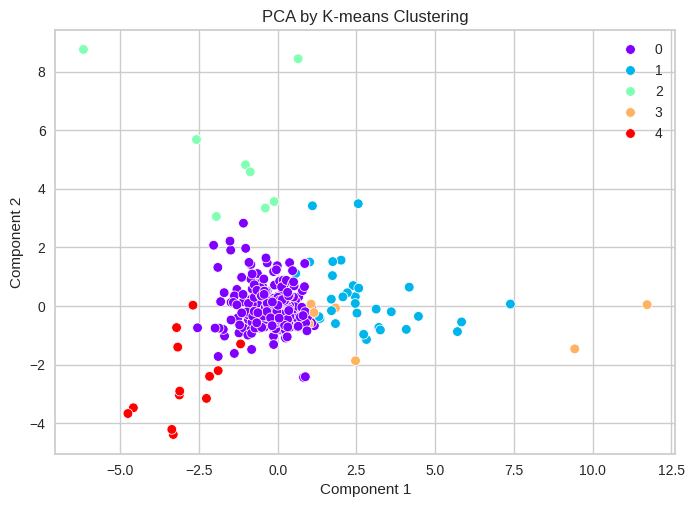

In [96]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df_kmeans["K_means_segments"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))
plt.title("PCA by K-means Clustering");

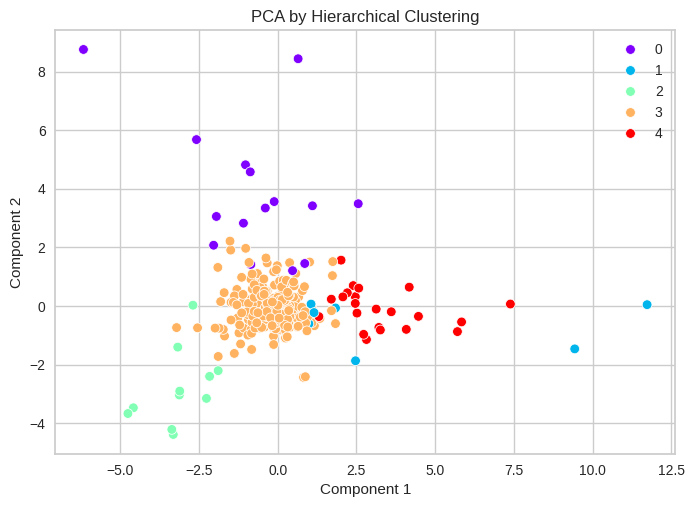

In [97]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df_hc["HC_Clusters"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))
plt.title("PCA by Hierarchical Clustering");

* From the above plots, we can observe that the five clusters, when projected to a two-dimensional space, can be linearly separable up to some extent.
* Clusters are more clearly separated in the first plot (kmeans), although the scatterplots are similar.

## K-means vs Hierarchical Clustering

In [98]:
# Display summary of k-means clustering
kmeans_profile.style.highlight_max(color="lightgreen", axis=0)

In [99]:
# Display summary of hierarchical clustering
hc_profile.style.highlight_max(color="lightgreen", axis=0)

- Both clustering techniques took minimal time to execute.

- While both techniques give similar clusters, k-means clusters seem more defined.

- K-means and Hierarchical clustering suggested 5 clusters.

- Both approaches have a predominantly bigger cluster with over 280 stocks, the other 4 clusters have between 7 and 31 observations in them.

- There are several similarities in both algorithms such as suggested number of clusters and observations per cluster.

- Other similarities include how the clusters were assigned by using the same variables. For example, cluster 2 with k-means and cluster 0 in hierarchical clustering have the highest prices, cash ratio, earnings per share, and P/E and P/B ratios.

- Both methods clustered all utilities under the broadest cluster, 0 in k-means and 3 in hierarchical. They also clustered most energy companies under similar clusters, 1 in k-means and 4 in hierarchical, the second largest cluster in each algorithm.


## Actionable Insights and Recommendations

- We created 5 different clusters to help investors better analyze stocks across different market segments. Based on K-means, here is a summary of the clusters:
  * Cluster 0: There are 281 companies and 11 economic sectors.
All Utilities stocks are in this cluster.
There is a wider variety of values in this cluster due to the high quantity of companies. There are many outliers on all variables.
  * Cluster 1: There are 31 companies and 6 economic sectors.
Most energy stocks are in this cluster.
Cluster 1 has the highest volatility average at ~2.77 and the cheapest current prices for stocks.
  * Cluster 2: There are 8 companies and 4 economic sectors.
Highest current prices and price increase of stocks as well as cash ratio, earnings per share, P/E ratio, and P/B ratio.
  * Cluster 3: There are 7 companies and 5 economic sectors.
Companies with the highest ROE are in this cluster.
It's the only cluster with many negative values (Net cash flow, Net income, Earnings per share, and P/B value)
  * Cluster 4: There are 13 companies and 7 economic sectors.
Companies in this cluster have the highest net cash flow, net income, and estimated shares outstanding. Wealthier companies are in this cluster.
Current price for stocks is cheaper in this cluster, but the overall price increased around 6%.

- Trade&Ahead can use the clusters to provide customers with personalized investment strategies.

- Detailed information on each cluster can be found under cluster profiling. In this section, investors are able to see the company names and economic sectors that are assigned to each cluster.

- A summary of each cluster is provided in a tabular form above that serves as a starting point to recommend a cluster to a client. However, Trade&Ahead needs to identify clients' goals before selecting a cluster.

- The firm can select stocks from different clusters to provide a diversified portfolio, yield higher returns, and face lower risk.

- The EDA portion of this analysis provides valuable insight across stocks, such as overall price changes and earnings per share on specific economic sectors. Before making a final selection on a stock, investors should consider overall tendencies using EDA.